# AI Methods for Business Final Project

**Course**: AI for Business Project



 **Program**: MSc Digital Driven Business – AUAS



 **Students**: Bustos Virginia , Roy Sreejoni, Ariana Ferrara, Reusch Benita



 **Date of submission**: 09/01/2026

## Introduction
Strategic decisions in the film industrys, such as release timing and budget allocation, are made under significant uncertainty and can strongly influence box-office performance. Recent advances in artificial intelligence enable firms to complement traditional decision-making approaches with data-driven predictive models.

This project applies machine learning techniques to forecast box-office revenue and support release-window decisions by combining structured film attributes with qualitative signals extracted from pre-release expert reviews using transformer-based embeddings. The study focuses on methodological rigor, reproducibility, and the translation of advanced AI methods into actionable business insights.


## Notebook Structure

Data Preparation and Feature Construction
- Data Sources and Scope
- Data Cleaning and Pre-processing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Text Representation Using Transformer Embeddings
- Dataset Splitting Strategy
- Handling Missing Values (Imputation)
- Feature Scaling
- Feature Selection via Matrix Decomposition (PCA)
- Data Preparation Summary

Modeling & Analysis
- Modeling Strategy Overview
- Baseline Model
- Random Forest Model
- Neural Network with Transformer-Based Features
- Model Evaluation & Comparison

Results & Business Implications
- From Business Questions to Data-Driven Insights
- Discussion 
- Limitations 
- Conclusion 
- References 
- Appendix 
- GenAI Declaration

**Data Preparation and Modeling Pipeline**

This diagram shows the end-to-end data preparation pipeline, highlighting how raw data is transformed into different feature representations used by different machine learning models. 

In [ ]:
pip uninstall graphviz

In [ ]:
import os
# Replace this path with the actual path to your graphviz 'bin' folder
os.environ["PATH"] += os.pathsep + 'C:/Users/arian/python/envs/AI_tutorials/Library/bin'

from graphviz import Digraph
# Your code here...

In [ ]:
# Virginia Bustos
from graphviz import Digraph

# Create diagram as SVG (best quality, no pixelation)
dot = Digraph("data_pipeline", format="svg", engine="dot")

# Global graph styling
dot.attr(
    "graph",
    rankdir="TB",          # top-to-bottom
    fontname="Arial",
    fontsize="12",
    nodesep="0.45",        # horizontal spacing between nodes
    ranksep="0.95",        # vertical spacing (prevents arrow/text overlap)
    pad="0.60",            # padding around whole diagram (prevents bottom clipping)
    margin="0.35",         # extra margin (prevents clipping)
    splines="polyline"     # cleaner than ortho for text-heavy diagrams
)

dot.attr(
    "node",
    shape="box",
    style="rounded",
    fontname="Arial",
    fontsize="12",
    margin="0.25,0.18"     #internal padding inside nodes (keeps text away from edges)
)

dot.attr(
    "edge",
    fontname="Arial",
    fontsize="10",
    arrowsize="0.75"
)

# Helper: centered HTML label
def add_node(node_id, title, subtitle=None):
    if subtitle:
        label = f"""<
        <TABLE BORDER="0" CELLBORDER="0" CELLPADDING="2">
          <TR><TD ALIGN="CENTER"><B>{title}</B></TD></TR>
          <TR><TD ALIGN="CENTER"><FONT POINT-SIZE="10">{subtitle}</FONT></TD></TR>
        </TABLE>
        >"""
    else:
        label = f"""<
        <TABLE BORDER="0" CELLBORDER="0" CELLPADDING="2">
          <TR><TD ALIGN="CENTER"><B>{title}</B></TD></TR>
        </TABLE>
        >"""
    dot.node(node_id, label=label)

# Nodes 
add_node("A", "Raw Excel files", "metaClean + sales + ExpertReviews")
add_node("B", "Cleaning + Merge", "Pre-release filter")
add_node("C", "Feature Engineering", "structured + transformer embeddings")
add_node("D", "Saved dataset", "X_features_with_embeddings.parquet + y_target.parquet")
add_node("E", "Train / Validation / Test split", "70 / 15 / 15")
add_node("F", "Split files", "X_train.parquet · X_val.parquet · X_test.parquet")

add_node("G", "Imputation", "fit on training data")

add_node("H", "Imputed output", "X_*_imputed.parquet")
add_node("RF", "Random Forest", "use imputed features")

add_node("I", "Scaling", "StandardScaler (fit on train)")
add_node("J", "Scaled output", "X_*_scaled.parquet")
add_node("K", "PCA", "fit on train · keep 95% variance")
add_node("L", "PCA output", "X_*_pca.parquet")

add_node("BL", "Baseline Model", "use PCA features")
add_node("NN", "Neural Network", "use PCA features")

# Edges

def connect(u, v, minlen="2"):
    dot.edge(u, v, tailport="s", headport="n", minlen=minlen)

connect("A", "B")
connect("B", "C")
connect("C", "D")
connect("D", "E")
connect("E", "F")
connect("F", "G", minlen="3")  # extra space before branching

# Branch 1: Imputation -> RF
connect("G", "H", minlen="3")
connect("H", "RF", minlen="3")

# Branch 2: Scaling -> PCA -> Models
connect("G", "I", minlen="3")
connect("I", "J", minlen="3")
connect("J", "K", minlen="3")
connect("K", "L", minlen="3")
connect("L", "BL", minlen="3")
connect("L", "NN", minlen="3")

#keep BL and NN on the same horizontal level for alignment
with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("BL")
    s.node("NN")

# Render
dot.render("data_preparation_pipeline_academic_v3", cleanup=True)
print("Saved as data_preparation_pipeline_academic_v3.svg")

from IPython.display import SVG, display
display(SVG(filename="data_preparation_pipeline_academic_v3.svg"))


## Purpose & Objective 

The purpose of this project is to apply machine learning methods to support strategic decision-making in the film industry by forecasting box-office revenue and informing release-timing choices. The objective is to develop a rigorous and reproducible modeling pipeline that combines structured film attributes with transformer-based representations of pre-release expert reviews, and to evaluate how these integrated features contribute to predictive performance and business-relevant insights.


## Business Questions

**Main business question**: How can studios use a machine learning model that combines structured film attributes (genre and budget) with transformer-based insights from pre-release expert reviews to recommend the optimal release timing for a film and accurately forecast the box-office revenue expected for that recommended window?


- **Sub-question 1**: How do structured film attributes such as genre and budget correlate with box-office performance, and which of these factors have the strongest historical influence on revenue outcomes?

- **Sub-question 2**: To what extent do transformer-based text embeddings from pre-release expert reviews improve predictive accuracy compared to models using only structured film attributes?

- **Sub-question 3**: How does release timing affect revenue performance across different genre and budget combinations, and can machine learning identify patterns that indicate optimal release windows?

- **Sub-question 4**: 
Can the final machine learning model reliably recommend the optimal release window and forecast expected box-office revenue for that timing based on a film’s genre, budget, and pre-release expert review text?


## Data Description

The dataset integrates structured film attributes with pre-release expert review data to support predictive modeling in a business context. Structured variables capture financial, categorical, and temporal characteristics of each film, while expert review texts are transformed into numerical representations using transformer-based embeddings. All variables are restricted to information available prior to release, ensuring that the dataset reflects realistic decision, that make conditions and provides a consistent basis for exploratory analysis and model development.


## EDA based in Business Questions

In [1]:
# Code Benita
import numpy as np
import pandas as pd
from plotnine import *  # Import everything for visualization
import os
import scipy
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Print all outputs
from IPython.core.display import HTML  # Pretty print DataFrames
import seaborn as sns  # For correlation heatmap
import matplotlib.pyplot as plt  # For displaying heatmap
import re  # Added import for regular expressions
import pickle #for caching

In [3]:
# Get current working directory
os.getcwd()

'c:\\Users\\arian\\OneDrive\\Desktop\\AI\\Assignment Material'

In [4]:
# Cache files for easy access - Code taken from Ariana's DBMS group project
CACHE_FOLDER = r"C:\Users\arian\Documents\cache_folder"
USE_CACHE = True

FILE_PATHS = {
    "sales_df": r"sales.xlsx",
    "meta_df": r"metaClean43Brightspace.xlsx",
    "expert_df": r"ExpertReviewsClean43LIWC (1).xlsx"
}

def create_cache_folder():
    """Create cache folder if it doesn't exist on the file system"""
    if not os.path.exists(CACHE_FOLDER):
        os.makedirs(CACHE_FOLDER)
        print(f"Created cache folder: {CACHE_FOLDER}")

def get_cache_path(filename):
    """Generate full file path for cached pickle file"""
    return os.path.join(CACHE_FOLDER, f"{filename}.pkl")

def save_to_cache(data, filename):
    """Save dataframe or data object to cache file using pickle serialization"""
    try:
        create_cache_folder()
        cache_path = get_cache_path(filename)
        with open(cache_path, 'wb') as f:
            pickle.dump(data, f)
        print(f"  Cached {filename}")
    except Exception as e:
        print(f"  Could not cache {filename}: {e}")

def load_from_cache(filename):
    """Load dataframe or data object from cache file if it exists"""
    try:
        cache_path = get_cache_path(filename)
        if os.path.exists(cache_path):
            with open(cache_path, 'rb') as f:
                data = pickle.load(f)
            print(f"  Loaded {filename} from cache")
            return data
        else:
            return None
    except Exception as e:
        print(f"  Could not load {filename} from cache: {e}")
        return None

In [5]:
# the functions were taken and adjusted from Ariana's DBMS group project

#function to load a singular dataset
def load_single_dataset(dataset_name, file_path):
    """Load a single dataset from cache or Excel file"""
    print(f"\nLoading {dataset_name}...")
    if USE_CACHE:
        cached_data = load_from_cache(dataset_name)
        if cached_data is not None:
            return cached_data

    try:
        print(f"  Loading from Excel: {file_path}")
        data = pd.read_excel(file_path)
        if USE_CACHE:
            save_to_cache(data, dataset_name)
        print(f"  Loaded {dataset_name} from Excel ({len(data)} rows)")
        return data
    except FileNotFoundError as e:
        print(f"  Error loading {dataset_name}: {e}")
        print("  Please check file path")
        raise


#function to load all datasets
def load_all_datasets():
    """Load sales_df , meta_df , and Expert_df datasets"""
    print("Loading datasets...")
    datasets = {}
    for dataset_name, file_path in FILE_PATHS.items():
        datasets[dataset_name] = load_single_dataset(dataset_name, file_path)

    print("\nAll files loaded successfully!")
    for name, df in datasets.items():
        print(f"\n{name} columns:")
        print(df.columns.tolist())
        print(f"Shape: {df.shape}")
    return datasets

#function to create a clean movie name
def clean_movie_name(text):
    """
    Aggressive cleaning for generating stable keys / IDs.
    - Lowercase
    - Strip URL path / punctuation
    - Remove brackets & years
    - Collapse spaces
    """
    if pd.isna(text) or text is None:
        return ""
    name = str(text).lower().strip().rstrip("/")

    # If it's a URL, just use the last segment after '/'
    name = name.rsplit("/", 1)[-1]

    # Replace dashes/underscores with spaces
    name = name.replace("-", " ").replace("_", " ")

    # Remove bracketed content () or []
    name = re.sub(r"\([^)]*\)|\[[^\]]*\]", "", name)

    # Remove non-alphanumeric (keep spaces)
    name = re.sub(r"[^a-z0-9 ]", "", name)

    # Remove trailing years like "1999" or "2016"
    name = re.sub(r"[\(\[]\s*(?:19|20)\d{2}[^)\]]*\s*[\)\]]\s*$|(?:19|20)\d{2}\s*$", "", name)

    # Collapse multiple spaces
    name = re.sub(r"\s+", " ", name).strip()

    return name

#function to pull movie title from sales dataset
def create_cleaned_title_for_sales(sales_df):
    """
    Ensure sales_df has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'url'
    - Else fall back to 'Title'/'title'
    - Else mark as empty
    """
    if "cleaned_title" in sales_df.columns:
        print("sales_df: 'cleaned_title' already exists, reusing.")
        return

    if "url" in sales_df.columns:
        source_col = "url"
        print("sales_df: creating 'cleaned_title' from 'url'")
    elif "Title" in sales_df.columns:
        source_col = "Title"
        print("sales_df: creating 'cleaned_title' from 'Title'")
    elif "title" in sales_df.columns:
        source_col = "title"
        print("sales_df: creating 'cleaned_title' from 'title'")
    else:
        print("sales_df: no suitable title-like column found, setting empty cleaned_title")
        sales_df["cleaned_title"] = ""
        return

    sales_df["cleaned_title"] = sales_df[source_col].apply(clean_movie_name)

#function to pull movie title from meta dataset
def create_cleaned_title_for_meta(meta_df):
    """
    Ensure meta_file_clean has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'Title'/'title'
    - Else fall back to 'url'
    - Else mark as empty
    """
    if "cleaned_title" in meta_df.columns:
        print("meta_file_clean: 'cleaned_title' already exists, reusing.")
        return

    if "Title" in meta_df.columns:
        source_col = "Title"
        print("meta_df: creating 'cleaned_title' from 'Title'")
    elif "title" in meta_df.columns:
        source_col = "title"
        print("meta_df: creating 'cleaned_title' from 'title'")
    elif "url" in meta_df.columns:
        source_col = "url"
        print("meta_df: creating 'cleaned_title' from 'url'")
    else:
        print("meta_df: no suitable title-like column found, setting empty cleaned_title")
        meta_df["cleaned_title"] = ""
        return

    meta_df["cleaned_title"] = meta_df[source_col].apply(clean_movie_name)

#function to pull movie title from expert reviews dataset
def create_cleaned_title_for_expert(expert_df):
    """
    Ensure expert_df has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'Title'/'title'
    - Else fall back to 'url'
    - Else mark as empty
    """
    if "cleaned_title" in expert_df.columns:
        print("expert_df: 'cleaned_title' already exists, reusing.")
        return

    if "Title" in expert_df.columns:
        source_col = "Title"
        print("expert_df: creating 'cleaned_title' from 'Title'")
    elif "title" in expert_df.columns:
        source_col = "title"
        print("expert_df: creating 'cleaned_title' from 'title'")
    elif "url" in expert_df.columns:
        source_col = "url"
        print("expert_df: creating 'cleaned_title' from 'url'")
    else:
        print("expert_df: no suitable title-like column found, setting empty cleaned_title")
        expert_df["cleaned_title"] = ""
        return

    expert_df["cleaned_title"] = expert_df[source_col].apply(clean_movie_name)

#function to create movie ID's
def create_movie_ids(datasets_dict):
    """
    Create stable movie_id values based on a single standardized 'cleaned_title'
    shared between all dataframes.

    - cleaned_title is the canonical movie name (lowercase, stripped)
    - movie_id is generated from unique cleaned_title across all datasets
    - Any raw 'Title' / 'title' columns are left alone here but are dropped later
    """
    sales_df = datasets_dict["sales_df"]
    meta_df = datasets_dict["meta_df"]
    expert_df = datasets_dict["expert_df"]

    # Build cleaned_title in all datasets
    create_cleaned_title_for_sales(sales_df)
    create_cleaned_title_for_meta(meta_df)
    create_cleaned_title_for_expert(expert_df)

    # Collect all cleaned titles
    all_cleaned = pd.concat([
        sales_df["cleaned_title"].dropna(),
        meta_df["cleaned_title"].dropna(),
        expert_df["cleaned_title"].dropna()
    ]).unique()

    # Filter out empty strings
    all_cleaned = [t for t in all_cleaned if isinstance(t, str) and t.strip() != ""]

    # Create movie_key dimension: movie_id to cleaned_title
    movie_key = pd.DataFrame([
        {
            "movie_id": idx + 1,
            "cleaned_title": cleaned
        }
        for idx, cleaned in enumerate(sorted(all_cleaned))
    ])

    print(f"\nCreated movie_key with {len(movie_key)} unique movies")

    # Map cleaned_title to movie_id
    name_to_id = dict(zip(movie_key["cleaned_title"], movie_key["movie_id"]))

    # Attach movie_id back to dataframes
    sales_df["movie_id"] = sales_df["cleaned_title"].map(name_to_id).astype("Int64")
    meta_df["movie_id"] = meta_df["cleaned_title"].map(name_to_id).astype("Int64")
    expert_df["movie_id"] = expert_df["cleaned_title"].map(name_to_id).astype("Int64")

    # drop any raw Title columns
    for df_name, df in [("sales_df", sales_df), ("meta_file_clean", meta_df), ("expert_df", expert_df)]:
        raw_title_cols = [c for c in df.columns if c.lower() == "title"]
        if raw_title_cols:
            df.drop(columns=raw_title_cols, inplace=True)
            print(f"{df_name}: dropped raw title columns {raw_title_cols}")

    return movie_key, sales_df, meta_df, expert_df

# merge datasets on movie_id (keeping cleaned_title)
def merge_datasets(meta_df, sales_df, expert_df):
    # Merge meta and sales datasets
    meta_sales = meta_df.merge(
        sales_df,
        on="movie_id",
        how="inner",
        suffixes=("_meta", "_sales")
    )

    # Merge the above result with the expert dataset
    merged = meta_sales.merge(
        expert_df,
        on="movie_id",
        how="inner",
        # Use a suffix for the new expert columns if there are name collisions
        suffixes=("", "_expert") 
    )
    print(f"\nMerged datasets on movie_id: {merged.shape[0]} rows")

    # unify cleaned_title
    if "cleaned_title_meta" in merged.columns and "cleaned_title_sales" in merged.columns:
        merged["cleaned_title"] = merged["cleaned_title_meta"]
        merged.drop(columns=["cleaned_title_meta", "cleaned_title_sales"], inplace=True)
        print("Merged: unified 'cleaned_title' column.")

    # Drop rows where movie_id was not assigned
    before = merged.shape[0]
    merged = merged[merged["movie_id"].notna()].copy()
    after = merged.shape[0]
    print(f"Dropped {before - after} rows due to missing movie_id")

    return merged


#run the above functions
if __name__ == "__main__":
    # 1. Load datasets
    datasets = load_all_datasets()
    sales_df = datasets["sales_df"]
    meta_df = datasets["meta_df"]
    expert_df = datasets["expert_df"]

    # 2. Create standardized cleaned_title + movie_id
    movie_key, sales_df, meta_df, expert_df = create_movie_ids(datasets)

    # 3. Merge on movie_id with a single cleaned_title column
    merged_df = merge_datasets(meta_df, sales_df, expert_df)

    # 4. ensure successful outputs
    print("\n=== merged_df HEAD (movie_id, cleaned_title) ===")
    print(merged_df[["movie_id", "cleaned_title"]].head())

    print("\n=== movie_key HEAD ===")
    print(movie_key.head())


Loading datasets...

Loading sales_df...
  Loaded sales_df from cache

Loading meta_df...
  Loaded meta_df from cache

Loading expert_df...
  Loaded expert_df from cache

All files loaded successfully!

sales_df columns:
['year', 'release_date', 'title', 'genre', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime', 'keywords', 'creative_type', 'url']
Shape: (30612, 16)

meta_df columns:
['url', 'title', 'studio', 'rating', 'runtime', 'cast', 'director', 'genre', 'summary', 'awards', 'metascore', 'userscore', 'RelDate']
Shape: (11364, 13)

expert_df columns:
['url', 'idvscore', 'reviewer', 'dateP', 'Rev', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant'

In [6]:
# Benita

# Display shapes and heads to verify loading
sales_df.shape
sales_df.head()
meta_df.shape
meta_df.head()
expert_df.shape
expert_df.head()

# Data types and info
sales_df.info()
meta_df.info()
expert_df.info()

# Check for missing values
sales_missing = sales_df.isnull().sum()
sales_missing[sales_missing > 0]
meta_missing = meta_df.isnull().sum()
meta_missing[meta_missing > 0]
expert_missing = expert_df.isnull().sum()
expert_missing[expert_missing > 0]

(30612, 17)

,year,release_date,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url,cleaned_title,movie_id
0,2000,January 1st,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...,bakha satang,2948
1,2001,January 12th,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust,antitrust,2067
2,2000,January 28th,NaN,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,https://www.the-numbers.com/movie/Santitos,santitos,25194
3,2002,2002 (Wide) by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Frank-McKlus...,frank mcklusky c i,10464
4,2002,January 25th,Drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,Coming of Age,Contemporary Fiction,https://www.the-numbers.com/movie/Walk-to-Reme...,walk to remember a,32608


(11364, 14)

,url,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate,cleaned_title,movie_id
0,https://www.metacritic.com/movie/!women-art-re...,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01,women art revolution,33445
1,https://www.metacritic.com/movie/10-cloverfiel...,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11,10 cloverfield lane,10
2,https://www.metacritic.com/movie/10-items-or-less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,2006-12-01,10 items or less,16
3,https://www.metacritic.com/movie/10-years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,2012-09-14,10 years,25
4,https://www.metacritic.com/movie/100-bloody-acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,2013-06-28,100 bloody acres,29


(238973, 100)

,url,idvscore,reviewer,dateP,Rev,WC,Analytic,Clout,Authentic,Tone,...,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,cleaned_title,movie_id
0,https://www.metacritic.com/movie/bronson,100.0,"""Andrew O'Hehir""",None,'Bronson owes a little or a lot to Kubrick s ...,25,73.88,11.52,6.70,25.77,...,0.0,0.0,0.0,0.00,0,8.00,0.0,0.0,bronson,4727
1,https://www.metacritic.com/movie/bronson,90.0,'A.O. Scott',None,'Bronson invites you to admire its protagonis...,30,13.07,97.69,1.00,99.00,...,0.0,0.0,0.0,0.00,0,6.67,0.0,0.0,bronson,4727
2,https://www.metacritic.com/movie/bronson,90.0,None,None,'Whether it s Peterson/Bronson s more theatri...,40,72.69,77.33,7.84,2.89,...,0.0,0.0,0.0,12.50,0,5.00,0.0,2.5,bronson,4727
3,https://www.metacritic.com/movie/bronson,83.0,'Noel Murray',None,'There are two Bronsons on display here: the ...,39,65.46,99.00,1.00,25.77,...,0.0,0.0,0.0,0.00,0,5.13,0.0,0.0,bronson,4727
4,https://www.metacritic.com/movie/bronson,80.0,'Joshua Rothkopf',None,'Refn has somehow found his way to an authent...,24,88.46,89.42,1.79,25.77,...,0.0,0.0,0.0,4.17,0,8.33,0.0,0.0,bronson,4727


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      30612 non-null  int64  
 1   release_date              30612 non-null  object 
 2   genre                     28908 non-null  object 
 3   international_box_office  21575 non-null  float64
 4   domestic_box_office       11884 non-null  float64
 5   worldwide_box_office      21575 non-null  float64
 6   production_budget         4480 non-null   float64
 7   Unnamed: 8                0 non-null      float64
 8   opening_weekend           10929 non-null  float64
 9   theatre_count             10963 non-null  float64
 10  avg run per theatre       10952 non-null  float64
 11  runtime                   24559 non-null  float64
 12  keywords                  12517 non-null  object 
 13  creative_type             26667 non-null  object 
 14  url   

genre                        1704
international_box_office     9037
domestic_box_office         18728
worldwide_box_office         9037
production_budget           26132
Unnamed: 8                  30612
opening_weekend             19683
theatre_count               19649
avg run per theatre         19660
runtime                      6053
keywords                    18095
creative_type                3945
movie_id                       19
dtype: int64

studio        350
rating       1067
runtime       255
cast         3702
director       14
genre          20
summary      5897
awards       6977
userscore    2105
movie_id       11
dtype: int64

idvscore      2
reviewer      2
dateP         2
Rev           2
movie_id    187
dtype: int64

In [7]:
# Ariana

#show the number of movies listed in specific datasets only
meta_only_ids = set(meta_df['movie_id'].dropna()) - set(merged_df['movie_id'])
sales_only_ids = set(sales_df['movie_id'].dropna()) - set(merged_df['movie_id'])
expert_only_ids = set(expert_df['movie_id'].dropna()) - set(merged_df['movie_id'])

print("Meta-only movies:", len(meta_only_ids))
print("Sales-only movies:", len(sales_only_ids))
print("Expert-only movies:", len(expert_only_ids))


Meta-only movies: 4375
Sales-only movies: 23169
Expert-only movies: 4384


In [8]:
# Ariana

#show the number of rows merged
print("Merged rows:", len(merged_df))

# verify the number of Movie ID's match the number of movies
print("Unique movie_ids in merged:", merged_df['movie_id'].nunique())
print("Unique cleaned_title in merged:", merged_df['cleaned_title'].nunique())

# print complete list of column names
print(merged_df.columns.tolist())

Merged rows: 179817
Unique movie_ids in merged: 6741
Unique cleaned_title in merged: 6741
['url_meta', 'studio', 'rating', 'runtime_meta', 'cast', 'director', 'genre_meta', 'summary', 'awards', 'metascore', 'userscore', 'RelDate', 'movie_id', 'year', 'release_date', 'genre_sales', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime_sales', 'keywords', 'creative_type', 'url_sales', 'url', 'idvscore', 'reviewer', 'dateP', 'Rev', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'perce

Now that we have 1 dataframe, we will combine like columns before further analysis

1. both 'sales' and 'meta' datasets have a genre column. Merge these together, to create one unified genre column.

2. create 1 sales column: use wordwide sales if exists, else, add domestic + international sales

In [9]:
# Ariana
# 1. Combine genre columns from different datasets into one long string
raw_text = merged_df['genre_sales'].fillna('') + "," + merged_df['genre_meta'].fillna('')

# 2. Clean it up: Split by comma -> Remove Duplicates (set) -> Join back
# We also verify 'if s.strip()' to make sure we don't include empty spaces
merged_df['genre'] = raw_text.apply(lambda x: ", ".join(set(s.strip() for s in x.split(',') if s.strip())))

# 3. Drop the old columns
merged_df = merged_df.drop(columns=['genre_sales', 'genre_meta'])

In [10]:
# Ariana
# Ensure columns are numeric (converts errors to NaN) -> This prevents crashes if your data has "$" signs or commas (e.g. "$1,000")
cols_to_fix = ['worldwide_box_office', 'international_box_office', 'domestic_box_office']
for col in cols_to_fix:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Define the logic function
def calculate_total_revenue(row):
    ww = row['worldwide_box_office']
    
    # Check if worldwide exists (not NaN) AND is not 0
    if pd.notna(ww) and ww != 0:
        return ww
    
    # if worldwide doesnt exist: Sum International + Domestic
    intl = row['international_box_office'] if pd.notna(row['international_box_office']) else 0
    dom = row['domestic_box_office'] if pd.notna(row['domestic_box_office']) else 0
    
    return intl + dom

# 3. Apply the function
merged_df['total_revenue'] = merged_df.apply(calculate_total_revenue, axis=1)


Now we will drop irrelevant columns, keeping only those necessary for future analysis

Note:
- We have yet to drop Expert reviews posted after the release date of the movie.
To achieve this, the columns 'dateP' , 'release_date', and 'Year' are needed. These columns will be dropped after filtering.

In [11]:
# Ariana
# drop all columns except those below
columns_to_keep = [
    "genre",
    "opening_weekend",
    "production_budget",
    "year",
    "release_date",
    "movie_id",
    "cleaned_title",
    "Rev",
    "total_revenue",
    "dateP"
]

merged_cleaned_df = merged_df[columns_to_keep]

# To verify the change:
print(merged_cleaned_df.head())

print("Columns after cleaning:")
print(merged_cleaned_df.columns)
print("Shape:", merged_cleaned_df.shape)

         genre  opening_weekend  production_budget  year release_date  \
0  Documentary           5791.0                NaN  2011     June 1st   
1  Documentary           5791.0                NaN  2011     June 1st   
2  Documentary           5791.0                NaN  2011     June 1st   
3  Documentary           5791.0                NaN  2011     June 1st   
4  Documentary           5791.0                NaN  2011     June 1st   

   movie_id         cleaned_title  \
0     33445  women art revolution   
1     33445  women art revolution   
2     33445  women art revolution   
3     33445  women art revolution   
4     33445  women art revolution   

                                                 Rev  total_revenue  \
0   'These interviews form the backbone of !W.A.R...        52681.0   
1   'In her vibrant !Women Art Revolution Hershma...        52681.0   
2   'It took 42 years for filmmaker Lynn Hershman...        52681.0   
3   'Anyone seeking a dialectic, of course, can l...  

In [12]:
# Ariana
# drop expert reviews posted after release date (using "year" and "release_date" vs "dateP")

# 1. Clean the 'release_date' text to remove st/nd/rd/th
merged_cleaned_df['release_date_clean'] = merged_cleaned_df['release_date'].astype(str).str.replace(r'(?<=\d)(st|nd|rd|th)', '', regex=True)

# 2. Create a combined string column (Year + Month + Day)
# Example: "2011" + " " + "June 1" = "2011 June 1"
merged_cleaned_df['full_date_str'] = merged_cleaned_df['year'].astype(str) + ' ' + merged_cleaned_df['release_date_clean']

# 3. Convert that string into a real Datetime object
merged_cleaned_df['full_release_date'] = pd.to_datetime(merged_cleaned_df['full_date_str'], errors='coerce')

# 4. Convert expert Review Date (dateP) to datetime as well
merged_cleaned_df['dateP'] = pd.to_datetime(merged_cleaned_df['dateP'], errors='coerce')

# now perform filtering

# Keep rows where the Review Date is BEFORE or ON the specific Release Date
mask = (merged_cleaned_df['dateP'] <= merged_cleaned_df['full_release_date']) & \
       (merged_cleaned_df['dateP'].notna()) & \
       (merged_cleaned_df['full_release_date'].notna())

merged_cleaned_df = merged_cleaned_df[mask]

# Rename and clean up
merged_cleaned_df = merged_cleaned_df.rename(columns={'Rev': 'prerelease_reviews'})

# Check the results
print(f"Remaining rows: {len(merged_cleaned_df)}")
print(merged_cleaned_df[['dateP', 'full_release_date', 'prerelease_reviews']].head())

Remaining rows: 65115
        dateP full_release_date  \
8  2011-05-31        2011-06-01   
11 2016-03-11        2016-03-11   
12 2016-03-10        2016-03-11   
13 2016-03-10        2016-03-11   
14 2016-03-10        2016-03-11   

                                   prerelease_reviews  
8    'Thankfully, Lynn Hershman-Leeson s loosely o...  
11   'Economically told from the start, the film m...  
12   'This is a terrific movie that will keep audi...  
13   'Sneakily tweaking our fears of terrorism, 10...  
14   'Approach 10 Cloverfield Lane on its own term...  


C:\Users\arian\AppData\Local\Temp\ipykernel_25580\3852565773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\arian\AppData\Local\Temp\ipykernel_25580\3852565773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\arian\AppData\Local\Temp\ipykernel_25580\3852565773.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [13]:
# Ariana
# List of all columns to remove (these columns were used in the cell above. they are not needed for further analysis).
cols_to_remove = [
    'dateP', 
    'full_release_date', 
    'year', 
    'release_date_clean',  
    'full_date_str'       
]

# Drop them with errors='ignore' so it won't crash if one of these is already gone
merged_cleaned_df = merged_cleaned_df.drop(columns=cols_to_remove, errors='ignore')

# Verify they are gone
print("Remaining columns:")
print(merged_cleaned_df.columns.tolist())

Remaining columns:
['genre', 'opening_weekend', 'production_budget', 'release_date', 'movie_id', 'cleaned_title', 'prerelease_reviews', 'total_revenue']


There are currently 2 dataframes being used for different purposes.

- merged_cleaned_df has the columns we will analyze - no one-hot encoding performed on genre.
- below, df_genre_encoded is created to perform EDA on genre-specific movies.

In [14]:
# Benita and Ariana
from sklearn.preprocessing import MultiLabelBinarizer

# 1. Clean and split the genre column into a list
df_genre_encoded = merged_cleaned_df.copy()

df_genre_encoded['genre_list'] = (
    df_genre_encoded['genre']
    .fillna('')                                # handle NaN
    .str.split(',')                            # split on comma
    .apply(lambda lst: 
           [g.strip().lower() for g in lst     # strip spaces + lowercase
            if g.strip() != ''])               # drop empty strings
)

# 2. Apply MultiLabelBinarizer to get one-hot columns
mlb = MultiLabelBinarizer()

genre_dummies = pd.DataFrame(
    mlb.fit_transform(df_genre_encoded['genre_list']),
    columns=[f"genre_{g}" for g in mlb.classes_],
    index=df_genre_encoded.index
)

# 3. Combine back into your dataframe
df_genre_encoded = pd.concat(
    [df_genre_encoded.drop(columns=['genre', 'genre_list']),
     genre_dummies],
    axis=1
)

# 4. Show new shape + columns
print("New shape:", df_genre_encoded.shape)
print("Genre columns:", genre_dummies.columns.tolist())

print("---------------------------------------")
print (df_genre_encoded.columns)
print("---------------------------------------")
print (df_genre_encoded.head)

New shape: (65115, 36)
Genre columns: ['genre_action', 'genre_adult', 'genre_adventure', 'genre_animation', 'genre_biography', 'genre_black comedy', 'genre_comedy', 'genre_concert/performance', 'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family', 'genre_fantasy', 'genre_history', 'genre_horror', 'genre_multiple genres', 'genre_music', 'genre_musical', 'genre_mystery', 'genre_news', 'genre_romance', 'genre_romantic comedy', 'genre_sci-fi', 'genre_short', 'genre_sport', 'genre_thriller', 'genre_thriller/suspense', 'genre_war', 'genre_western']
---------------------------------------
Index(['opening_weekend', 'production_budget', 'release_date', 'movie_id',
       'cleaned_title', 'prerelease_reviews', 'total_revenue', 'genre_action',
       'genre_adult', 'genre_adventure', 'genre_animation', 'genre_biography',
       'genre_black comedy', 'genre_comedy', 'genre_concert/performance',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fan

In [15]:
# Benita
# Descriptive statistics for numerical columns
numerical_cols = ['total_revenue', 'production_budget', 'opening_weekend']
merged_cleaned_df[numerical_cols].describe()

,total_revenue,production_budget,opening_weekend
count,6.511500e+04,3.547300e+04,5.260100e+04
mean,1.160901e+08,6.148203e+07,1.742844e+07
std,2.517252e+08,6.562209e+07,3.345464e+07
min,0.000000e+00,2.000000e+04,8.600000e+01
25%,1.903200e+05,1.500000e+07,5.735300e+04
50%,1.072754e+07,3.500000e+07,4.174915e+06
75%,1.030393e+08,9.000000e+07,1.954225e+07
max,2.797801e+09,4.000000e+08,3.571150e+08


In [16]:
# Ariana
# Identify the new columns in df_genre_encoded dataframe
genre_cols = [col for col in df_genre_encoded.columns if col.startswith('genre_')]

#Sum them up
genre_counts = df_genre_encoded[genre_cols].sum().sort_values(ascending=False)

#Print result
print(genre_counts)

genre_drama                  37304
genre_comedy                 20499
genre_thriller               18082
genre_action                 15099
genre_adventure              12125
genre_sci-fi                  8480
genre_crime                   8472
genre_thriller/suspense       8074
genre_romance                 7767
genre_documentary             7612
genre_fantasy                 7195
genre_horror                  7056
genre_biography               6688
genre_mystery                 5826
genre_family                  4607
genre_history                 3459
genre_animation               3088
genre_music                   2988
genre_romantic comedy         2217
genre_war                     2151
genre_musical                 1860
genre_sport                   1517
genre_black comedy            1412
genre_western                  601
genre_news                     322
genre_concert/performance      138
genre_multiple genres           67
genre_adult                     41
genre_short         

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation: Budget vs. Opening vs. Revenue')

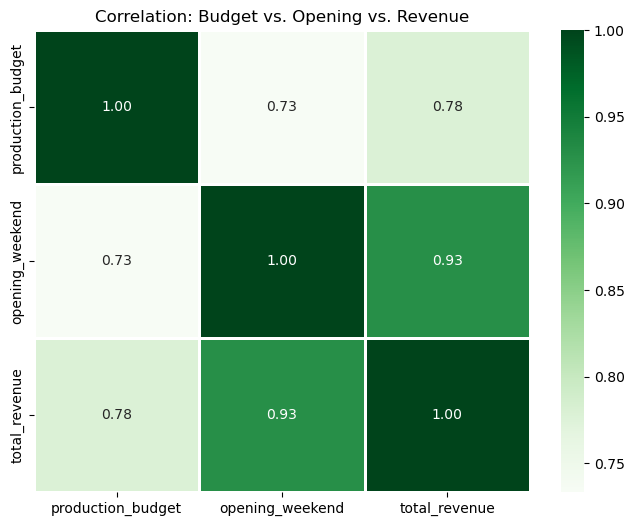

In [17]:
# Benita
# Select only the numerical columns we have right now
# We use .drop_duplicates('movie_id') to ensure we don't count the same movie 50 times
df_unique = merged_cleaned_df.drop_duplicates(subset=['movie_id'])

cols_to_check = ['production_budget', 'opening_weekend', 'total_revenue']

# Create the Correlation Matrix
corr_matrix = df_unique[cols_to_check].corr()

#Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=1)
plt.title('Correlation: Budget vs. Opening vs. Revenue')
plt.show()

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='production_budget', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Production Budget')

Text(0.5, 0, 'Budget ($)')

<Axes: >

<Axes: xlabel='total_revenue', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total Revenue')

Text(0.5, 0, 'Revenue ($)')

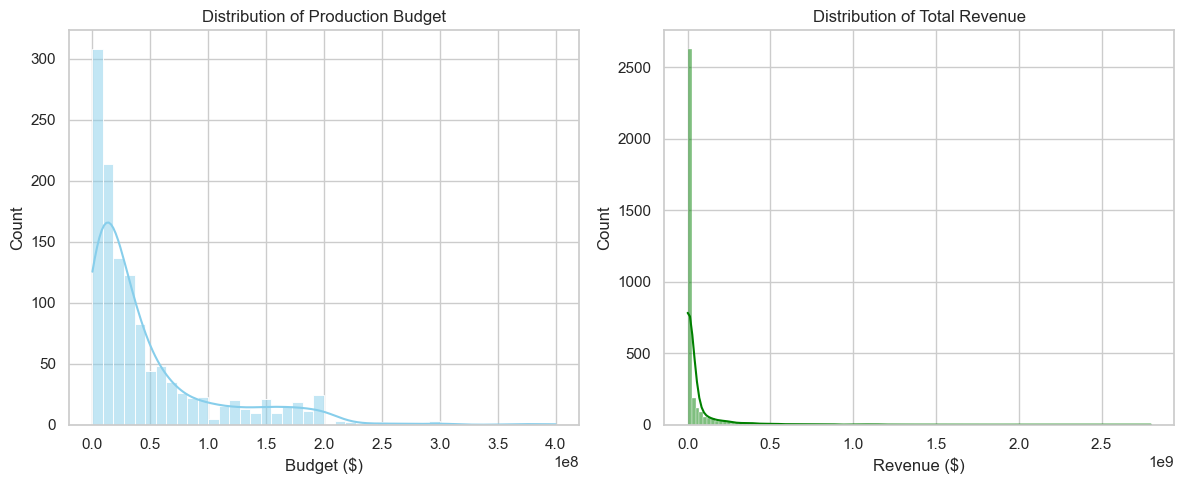

In [18]:
# Ariana
# Set the visual style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 5))

# Plot 1: Production Budget Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_unique['production_budget'], kde=True, color='skyblue')
plt.title('Distribution of Production Budget')
plt.xlabel('Budget ($)')

# Plot 2: Total Revenue Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_unique['total_revenue'], kde=True, color='green')
plt.title('Distribution of Total Revenue')
plt.xlabel('Revenue ($)')

plt.tight_layout()
plt.show()

Review Stats:
count       3475.0
mean     18.738129
std      17.257421
min            1.0
25%            8.0
50%           13.0
75%           25.0
max          308.0
Name: count, dtype: Float64


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Review Counts per Movie')

Text(0.5, 0, 'Number of Reviews')

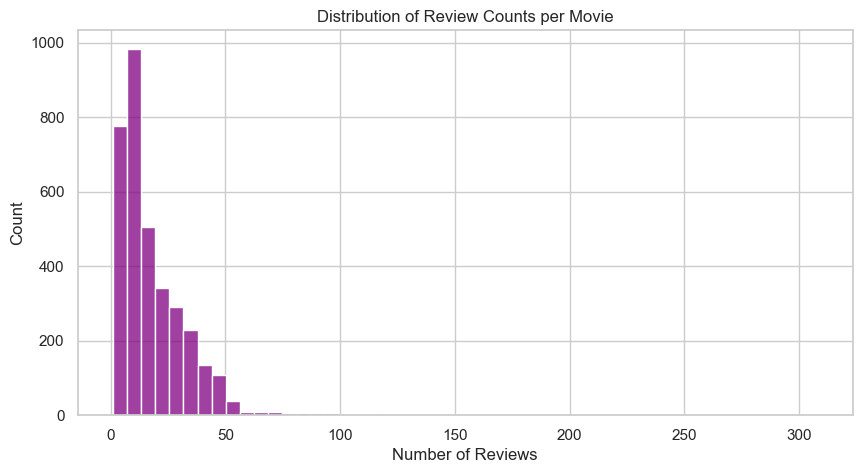

In [19]:
# Ariana
# Count how many reviews exist per movie_id
reviews_per_movie = df_genre_encoded['movie_id'].value_counts()

print("Review Stats:")
print(reviews_per_movie.describe())

plt.figure(figsize=(10, 5))
sns.histplot(reviews_per_movie, bins=50, color='purple')
plt.title('Distribution of Review Counts per Movie')
plt.xlabel('Number of Reviews')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='production_budget', ylabel='total_revenue'>

Text(0.5, 1.0, 'Production Budget vs. Total Revenue (Log Scale)')

Text(0.5, 0, 'Production Budget ($)')

Text(0, 0.5, 'Total Revenue ($)')

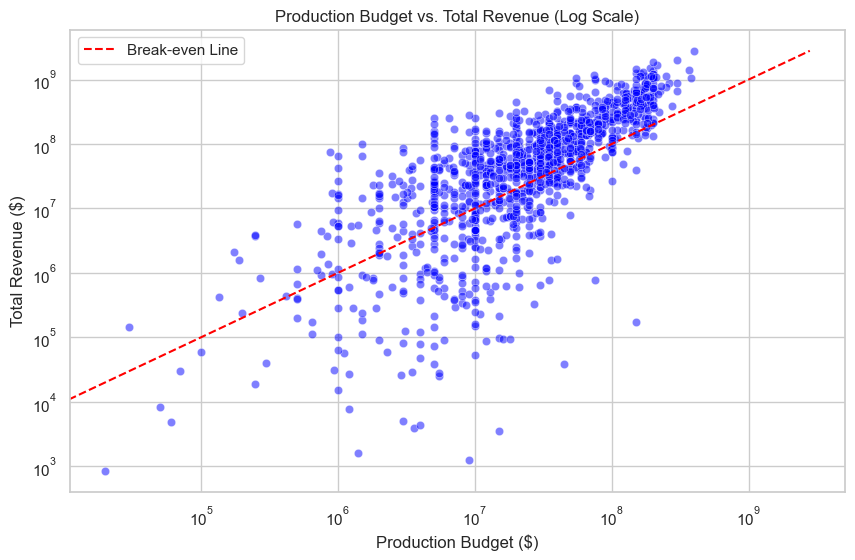

In [20]:
# Ariana
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unique, x='production_budget', y='total_revenue', alpha=0.5, color='blue')

# Add a diagonal line (Break-even line)
# Movies below this line lost money. Movies above it made a profit.
max_val = max(df_unique['production_budget'].max(), df_unique['total_revenue'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Break-even Line')

plt.xscale('log')
plt.yscale('log')
plt.title('Production Budget vs. Total Revenue (Log Scale)')
plt.xlabel('Production Budget ($)')
plt.ylabel('Total Revenue ($)')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='word_count', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Review Lengths (Word Count)')

Text(0.5, 0, 'Number of Words in Review')

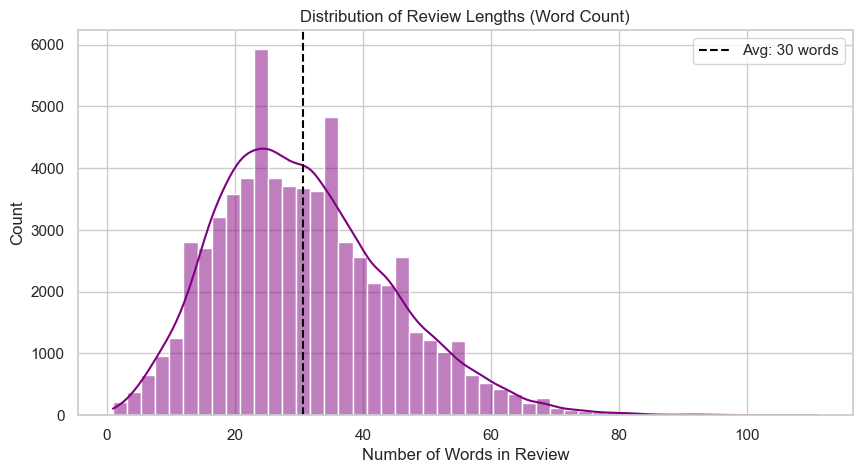

Number of reviews with less than 5 words: 388


In [21]:
# Ariana
#Calculate word count for every review

# use the original dataframe 'df_genre_encoded' because we want to check ALL reviews
df_genre_encoded['word_count'] = df_genre_encoded['prerelease_reviews'].astype(str).apply(lambda x: len(x.split()))

# Plot the Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_genre_encoded['word_count'], bins=50, color='purple', kde=True)
plt.title('Distribution of Review Lengths (Word Count)')
plt.xlabel('Number of Words in Review')
plt.axvline(df_genre_encoded['word_count'].mean(), color='black', linestyle='--', label=f"Avg: {int(df_genre_encoded['word_count'].mean())} words")
plt.legend()
plt.show()

# check for short reviews
short_reviews = df_genre_encoded[df_genre_encoded['word_count'] < 5]
print(f"Number of reviews with less than 5 words: {len(short_reviews)}")


In [22]:
# Benita
# ROI = (revenue - budget) / budget
merged_cleaned_df['roi'] = (merged_cleaned_df['total_revenue'] - merged_cleaned_df['production_budget']) / merged_cleaned_df['production_budget']
df_genre_encoded['roi'] = (merged_cleaned_df['total_revenue'] - merged_cleaned_df['production_budget']) / merged_cleaned_df['production_budget']

# Create a new dataframe with only valid budgets
roi_df = merged_cleaned_df.dropna(subset=['production_budget'])

# Drop duplicates based on the movie title to ensure each movie is only represented once
roi_df_unique = roi_df.drop_duplicates(subset=['cleaned_title'])

# Verify it worked
print(f"Original rows: {len(merged_cleaned_df)}")
print(f"Rows with budget: {len(roi_df_unique)}")
print('\n')
print(roi_df_unique[['cleaned_title', 'production_budget', 'roi']].head())

# Keep rows where budget exists AND is greater than 0
roi_df = merged_cleaned_df[merged_cleaned_df['production_budget'] > 0]

# check top performers
print('\n-----------TOP PERFORMERS (Unique Movies)-----------')
print(roi_df_unique[['cleaned_title', 'roi']].sort_values(by='roi', ascending=False).head())

Original rows: 65115
Rows with budget: 1251


                                cleaned_title  production_budget       roi
11                        10 cloverfield lane         15000000.0  6.219095
203                                 12 strong         35000000.0  1.031954
262                          12 years a slave         20000000.0  8.038253
306                                 127 hours         18000000.0  2.345398
385  13 hours the secret soldiers of benghazi         50000000.0  0.388227

-----------TOP PERFORMERS (Unique Movies)-----------
       cleaned_title        roi
174855     searching  84.950053
112433     insidious  65.580591
201243    unfriended  63.364198
93626        get out  49.459481
140695     moonlight  42.438093


In [23]:
# Benita
# Derive budget_level
def categorize_budget(budget):
    if budget < 10000000:
        return 'Low'
    elif budget <= 50000000:
        return 'Medium'
    else:
        return 'High'

df_genre_encoded['budget_level'] = merged_cleaned_df['production_budget'].apply(categorize_budget)

In [24]:
# Benita
# Identify all your genre columns
genre_cols = [col for col in df_genre_encoded.columns if col.startswith('genre_')]

# Create a list to store the results
results = []

for genre in genre_cols:
    # Filter rows where this specific genre is 1 (True)
    genre_data = df_genre_encoded[df_genre_encoded[genre] == 1]
    
    # Calculate stats for this genre
    # Use 'total_revenue' if you created it in the previous step, otherwise use 'total_revenue'
    stats = genre_data['total_revenue'].agg(['mean', 'median', 'count'])
    
    # Add the genre name (stripping 'genre_' for cleanliness)
    stats['genre'] = genre.replace('genre_', '')
    results.append(stats)

# Convert list of series to a DataFrame
genre_stats = pd.DataFrame(results).set_index('genre')

# Sort and print
genre_stats = genre_stats.sort_values('mean', ascending=False)

print("\nSub-question 1: Genre Influence on Revenue")
print(genre_stats)


Sub-question 1: Genre Influence on Revenue
                             mean       median    count
genre                                                  
adult                5.707950e+08  570794950.0     41.0
adventure            4.042509e+08  273477501.0  12125.0
fantasy              3.832421e+08  214949716.0   7195.0
sci-fi               3.736059e+08  242981799.0   8480.0
animation            3.650182e+08  249517956.0   3088.0
family               3.404421e+08  212550576.0   4607.0
action               3.081876e+08  166360232.0  15099.0
musical              2.792877e+08   74146087.0   1860.0
thriller             1.440525e+08   33943049.0  18082.0
war                  1.298995e+08   23237252.0   2151.0
comedy               1.230052e+08   26887177.0  20499.0
crime                1.203718e+08   37566117.0   8472.0
mystery              1.095566e+08   35950421.0   5826.0
romance              9.547660e+07   15342913.0   7767.0
horror               9.251123e+07   18976477.0   7056.0
musi

In [25]:
# Benita
# Identify genre columns
genre_cols = [col for col in df_genre_encoded.columns if col.startswith('genre_')]

# Lists to store the results
roi_results = []
revenue_results = []

for genre_col in genre_cols:
    # Get the simple name (e.g., "Action" instead of "genre_Action")
    genre_name = genre_col.replace('genre_', '')
    
    # Filter for movies that belong to this genre
    genre_data = df_genre_encoded[df_genre_encoded[genre_col] == 1]
    
    # --- ROI Analysis ---
    # Group by budget_level for this specific genre
    roi_stats = df_genre_encoded.groupby('budget_level')['roi'].agg(['mean', 'count'])
    roi_stats['genre'] = genre_name  # Add genre name to keep track
    roi_results.append(roi_stats)
    
    # --- Revenue Analysis ---
    rev_stats = genre_data.groupby('budget_level')['total_revenue'].agg(['mean', 'count'])
    rev_stats['genre'] = genre_name
    revenue_results.append(rev_stats)

# Combine all results into single DataFrames
budget_genre_roi = pd.concat(roi_results).reset_index().set_index(['genre', 'budget_level']).sort_values('mean', ascending=False)
budget_genre_revenue = pd.concat(revenue_results).reset_index().set_index(['genre', 'budget_level']).sort_values('mean', ascending=False)

# Print results
print("\nSub-question 2: Budget Level and ROI by Genre")
print("ROI Stats (Top 10):")
print(budget_genre_roi.head(10))

print("\nRevenue Stats (Top 10):")
print(budget_genre_revenue.head(10))


Sub-question 2: Budget Level and ROI by Genre
ROI Stats (Top 10):
                                      mean  count
genre               budget_level                 
horror              Low           5.749399   5729
fantasy             Low           5.749399   5729
news                Low           5.749399   5729
documentary         Low           5.749399   5729
family              Low           5.749399   5729
romance             Low           5.749399   5729
crime               Low           5.749399   5729
musical             Low           5.749399   5729
romantic comedy     Low           5.749399   5729
concert/performance Low           5.749399   5729

Revenue Stats (Top 10):
                                mean  count
genre     budget_level                     
adult     Medium        5.707950e+08     41
adventure High          4.703834e+08  10076
sci-fi    High          4.490548e+08   6770
fantasy   High          4.454999e+08   5987
animation High          4.181276e+08   2600


## Feature Engineering and Text Representation

The purpose of this part of notebook is to transform the cleaned Metacritic dataset into a machine-learning-ready feature set that supports revenue prediction and release-timing recommendation. This step bridges the gap between exploratory analysis and model development by converting both structured and unstructured data into numerical representations suitable for supervised learning.

First, structured film attributes such as genre, budget, and release timing are engineered and transformed into informative features that capture business-relevant patterns, including budget scale and seasonal release effects. Categorical variables are encoded, and numerical variables are prepared for downstream modelling to ensure compatibility with baseline, tree-based, and neural network models.

Second, unstructured pre-release expert review text is incorporated using a transformer-based language model from the Hugging Face ecosystem. By extracting dense semantic embeddings from expert reviews, qualitative assessments are translated into quantitative features that capture sentiment, tone, and contextual meaning beyond traditional numerical variables.

The resulting feature set combines structured film metadata with transformer-based textual insights, forming the foundation for subsequent train/validation/test splitting, feature selection, model training, evaluation, and explainability analyses.


In [26]:
#Sreejoni Roy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!conda install openpyxl -y



3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [27]:
#Roy
from datetime import datetime

In [28]:
#Roy
pd.set_option("display.max_columns", 200) #showing the columns when print is coded.

In [29]:
#Roy
# Loading the cleaned metacritic file as it has genre, metascore/userscore, etc.
meta = pd.read_excel("metaClean43Brightspace.xlsx")

# Loading the sales/box office file as it has budget and worldwide_box_office etc.
sales = pd.read_excel("sales.xlsx")

# Load the expert reviews which has the text needed for the transformers
expert = pd.read_excel("ExpertReviews.xlsx")


In [30]:
#roy
#printing to see the file content/shape
print("meta:", meta.shape)
print("sales:", sales.shape)
print("expert:", expert.shape)

meta: (11364, 13)
sales: (30612, 16)
expert: (238973, 5)


In [31]:
#roy
print("meta columns:\n", meta.columns.tolist(), "\n")
print("sales columns:\n", sales.columns.tolist(), "\n")
print("expert columns:\n", expert.columns.tolist(), "\n")
#printing to see all the columns for the three datafiles

meta columns:
 ['url', 'title', 'studio', 'rating', 'runtime', 'cast', 'director', 'genre', 'summary', 'awards', 'metascore', 'userscore', 'RelDate'] 

sales columns:
 ['year', 'release_date', 'title', 'genre', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime', 'keywords', 'creative_type', 'url'] 

expert columns:
 ['url', 'idvscore', 'reviewer', 'dateP', 'Rev'] 



In [32]:
#roy
#displaying 2 rows for each of the datafiles to see the content
display(meta.head(2))
display(sales.head(2))
display(expert.head(2))

,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11


,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
0,2000,January 1st,Bakha Satang,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...
1,2001,January 12th,Antitrust,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust


,url,idvscore,reviewer,dateP,Rev
0,https://www.metacritic.com/movie/bronson,100.0,"""Andrew O'Hehir""",None,'Bronson owes a little or a lot to Kubrick s ...
1,https://www.metacritic.com/movie/bronson,90.0,'A.O. Scott',None,'Bronson invites you to admire its protagonis...


In [33]:
#roy
# Merging the url because it is the cleanest unique ID across the files
df = meta.merge(
    sales,
    on="url",
    how="left",     #it is left because all the cleaned Metacritic rows are kept, and sales numbers will attach when available.
    suffixes=("_meta", "_sales")
)


In [34]:
#roy
print("After merge:", df.shape) #to see the effect of the code above

# Quick check to see how many rows have information on sales?
print("Missing production_budget:", df["production_budget"].isna().mean())
print("Missing worldwide_box_office:", df["worldwide_box_office"].isna().mean())

After merge: (11364, 28)
Missing production_budget: 1.0
Missing worldwide_box_office: 1.0


In [35]:
#roy
# Resolving release date (sales file has 'release_date', meta has 'RelDate')
# sales.release_date because it is cleaner for timing.

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# backup plan if release_date is missing. using RelDate from meta
df["RelDate"] = pd.to_datetime(df["RelDate"], errors="coerce")
df["release_date"] = df["release_date"].fillna(df["RelDate"])

In [36]:
df["release_date"] = pd.to_datetime(df["RelDate"], errors="coerce") #code fixer for month to season error
#roy

In [37]:
#roy
# Creating the timing features
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_quarter"] = df["release_date"].dt.quarter

In [38]:
#roy
# a season mapping in order to categorize months into season
#this is needed so that the end product/model can tell the user/studio which season is the best realease window for their movie.
def month_to_season(m):
    if pd.isna(m):
        return np.nan
    if m in [12, 1, 2]:
        return "Winter"
    if m in [3, 4, 5]:
        return "Spring"
    if m in [6, 7, 8]:
        return "Summer"
    return "Fall"


df["release_month"] = df["release_date"].dt.month
df["release_season"] = df["release_month"].apply(month_to_season)


In [39]:
#roy
# features for budget 
df["production_budget"] = pd.to_numeric(df["production_budget"], errors="coerce")
df["budget_log"] = np.log1p(df["production_budget"])

In [40]:
#roy
#this step of the code is run to avoid errors in the codes below.
# creating a clean merge key in BOTH dataframes/files
meta["title_key"]  = meta["title"].astype(str).str.lower().str.strip()
sales["title_key"] = sales["title"].astype(str).str.lower().str.strip()

#  removing the year in brackets, extra spaces, punctuation 
meta["title_key"]  = meta["title_key"].str.replace(r"\(\d{4}\)", "", regex=True).str.replace(r"[^a-z0-9 ]", "", regex=True).str.strip()
sales["title_key"] = sales["title_key"].str.replace(r"\(\d{4}\)", "", regex=True).str.replace(r"[^a-z0-9 ]", "", regex=True).str.strip()

#  merging again (bringing budget in from sales)
df = meta.merge(sales[["title_key", "production_budget"]], on="title_key", how="left")

# little sanity check
print("Budget missing rate:", df["production_budget"].isna().mean())
df[["title", "production_budget"]].head(10)

Budget missing rate: 0.675531914893617


,title,production_budget
0,!Women Art Revolution,NaN
1,10 Cloverfield Lane,15000000.0
2,10 Items or Less,NaN
3,10 Years,NaN
4,100 Bloody Acres,NaN
5,100 Streets,NaN
6,"1,000 Times Good Night",NaN
7,"10,000 BC",105000000.0
8,"10,000 km",NaN
9,1001 Grams,NaN


In [41]:
#roy
# labeling bugdet levels into low, mid and high.
#this is needed as the user/studio needs to input whether their movie's budget is low, mid or high.
b = df["production_budget"]
k = min(3, b.nunique(dropna=True))

if k < 2:
    df["budget_level"] = "Unknown"
else:
    label_map = {2: ["Low", "High"], 3: ["Low", "Mid", "High"]}
    df["budget_level"] = pd.qcut(b, q=k, labels=label_map[k], duplicates="drop").astype(str)
    df["budget_level"] = df["budget_level"].fillna("Unknown")

In [42]:
#roy 
df = meta.merge(   #Merging budget and worldwide revenue from sales into meta 
    sales[
        [
            "title_key",
            "production_budget",
            "worldwide_box_office",
            "domestic_box_office",
            "international_box_office",
        ]
    ],
    on="title_key",
    how="left"
)

In [43]:
#roy
df["worldwide_box_office"] = pd.to_numeric(
    df["worldwide_box_office"], errors="coerce"
)

df["revenue_log"] = np.log1p(df["worldwide_box_office"])
#Converting revenue to numeric and doing log-transform

Financial variables such as production budget and worldwide box office revenue were integrated from an external sales dataset using normalized title keys. Due to skewness in revenue data, a log transformation was applied.

In [44]:
#roy
df[["title", "production_budget", "worldwide_box_office"]].head(10)
df["worldwide_box_office"].isna().mean()
#simple check to see if the code above worked

,title,production_budget,worldwide_box_office
0,!Women Art Revolution,NaN,NaN
1,10 Cloverfield Lane,15000000.0,108286422.0
2,10 Items or Less,NaN,NaN
3,10 Years,NaN,987640.0
4,100 Bloody Acres,NaN,NaN
5,100 Streets,NaN,307.0
6,"1,000 Times Good Night",NaN,NaN
7,"10,000 BC",105000000.0,269065678.0
8,"10,000 km",NaN,20452.0
9,1001 Grams,NaN,47019.0


np.float64(0.4831283244680851)

In [45]:
#roy
#target variable for understanding/measuring the level of success for the movie- worldwide box office
df["worldwide_box_office"] = pd.to_numeric(df["worldwide_box_office"], errors="coerce")
df["revenue_log"] = np.log1p(df["worldwide_box_office"])



In [46]:
#Virginia Bustos
#Ensures required temporal features exist for downstream analysis without altering original code
# ============================================================
# PREP STEP – ensure release_month & release_season exist
# (no release date available in df)

# If release_month already exists somewhere under another name, reuse it
month_candidates = ["release_month", "month", "releaseMonth"]

month_col = next((c for c in month_candidates if c in df.columns), None)

if month_col is None:
    # Fallback: assign NA instead of failing (prevents downstream errors)
    df["release_month"] = pd.NA
else:
    df["release_month"] = df[month_col]

# Create release_season only if missing
if "release_season" not in df.columns:
    def month_to_season(month):
        if pd.isna(month):
            return pd.NA
        month = int(month)
        if month in [12, 1, 2]:
            return "Winter"
        elif month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        else:
            return "Autumn"

    df["release_season"] = df["release_month"].apply(month_to_season)

print("✔ release_month & release_season prepared (no release date column available)")


✔ release_month & release_season prepared (no release date column available)


In [47]:
#roy
#ROI feature 
df["roi"] = df["worldwide_box_office"] / df["production_budget"]
#seeing the display - content check
display(df[["title", "genre", "production_budget", "worldwide_box_office", "roi", "release_month", "release_season"]].head())

,title,genre,production_budget,worldwide_box_office,roi,release_month,release_season
0,!Women Art Revolution,Documentary,NaN,NaN,NaN,<NA>,<NA>
1,10 Cloverfield Lane,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",15000000.0,108286422.0,7.219095,<NA>,<NA>
2,10 Items or Less,"Drama,Comedy,Romance",NaN,NaN,NaN,<NA>,<NA>
3,10 Years,"Drama,Comedy,Romance",NaN,987640.0,NaN,<NA>,<NA>
4,100 Bloody Acres,"Horror,Comedy",NaN,NaN,NaN,<NA>,<NA>


Until now 
1) dates were converted,
2) Season features were created for optimal release window,
3) buget features (log and categories) and 
4) revenue target (along with a log version) was created



In [48]:
#roy
# resolving the expert review dates
expert["dateP"] = pd.to_datetime(expert["dateP"], errors="coerce")

C:\Users\arian\AppData\Local\Temp\ipykernel_25580\4088013954.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [49]:
#Virginia Bustos
# ensure df has 'release_date' for review merge cell
# Reason: df gets overwritten by later merges (title_key), dropping release_date.

#If release_date is missing, create it from the best available source
if "release_date" not in df.columns:
    # Prefer RelDate (meta), fallback to other possible columns if present
    date_candidates = ["RelDate", "reldate", "releaseDate", "release_date_meta"]
    src = next((c for c in date_candidates if c in df.columns), None)

    if src is None:
        # Create the column anyway so the downstream cell doesn't crash
        df["release_date"] = pd.NaT
    else:
        df["release_date"] = pd.to_datetime(df[src], errors="coerce")
else:
    # Make sure it's datetime (so date comparisons work later)
    df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

print("release_date ensured. Null rate:", df["release_date"].isna().mean())


release_date ensured. Null rate: 0.0


In [50]:
#roy
# merging the  reviews into the main df (by using url)
# This will create a long table with one row per (movie x review)
df_reviews = df[["url", "title", "release_date"]].merge(
    expert[["url", "dateP", "Rev", "idvscore"]],
    on="url",
    how="left"
)

print("df_reviews:", df_reviews.shape) #content check

df_reviews: (253921, 6)


In [51]:
#roy
# only kepping reviews that happened BEFORE release_date (pre-release)
#this is needed as model/product needs the pre-release expert reviews inputted by the studios/user.
#transformers will be used on the expert reviews.
df_reviews_pre = df_reviews[
    (df_reviews["dateP"].notna()) &
    (df_reviews["release_date"].notna()) &
    (df_reviews["dateP"] <= df_reviews["release_date"])
].copy()

print("pre-release review rows:", df_reviews_pre.shape)
#content check

pre-release review rows: (107111, 6)


In [52]:
#roy
# Combining all pre-release reviews into one text blob per movie
# This makes it easier for embeddings rather than doing many reviews separately
review_text_per_movie = (
    df_reviews_pre.groupby("url")["Rev"]
    .apply(lambda x: " ".join(x.dropna().astype(str)))
    .reset_index()
    .rename(columns={"Rev": "pre_release_expert_text"})
)

display(review_text_per_movie.head(3)) #content check 

,url,pre_release_expert_text
0,https://www.metacritic.com/movie/!women-art-re...,"'Thankfully, Lynn Hershman-Leeson s loosely o..."
1,https://www.metacritic.com/movie/10-cloverfiel...,"'Economically told from the start, the film m..."
2,https://www.metacritic.com/movie/10-years,"'There s a relaxed, unforced, melancholy swee..."


In [53]:
#roy
#adding the combined texts back into the main dataframe

df = df.merge(review_text_per_movie, on="url", how="left")

# Filling in the missing text with empty string so the transformer codes do not give errors or crash
df["pre_release_expert_text"] = df["pre_release_expert_text"].fillna("")

print("Movies with no pre-release text:", (df["pre_release_expert_text"] == "").mean())
display(df[["title", "pre_release_expert_text"]].head(2)) #content check


Movies with no pre-release text: 0.4249501329787234


,title,pre_release_expert_text
0,!Women Art Revolution,"'Thankfully, Lynn Hershman-Leeson s loosely o..."
1,10 Cloverfield Lane,"'Economically told from the start, the film m..."


In [54]:
#roy
#encoding the structured features in order to pick the columns that need to be put in the model/product.
# the basic structured features 
num_cols = ["budget_log", "metascore", "userscore"]  #for futher product expansion/development, more features can be added here
cat_cols = ["genre", "release_season", "release_quarter", "budget_level"]

In [55]:
#roy
target_col = "revenue_log"  # prediction target


In [56]:
#roy
# Some rows might miss the target therefore the codes drop them for modelling later
df_model = df.dropna(subset=[target_col]).copy()

print("df_model:", df_model.shape) #content check

df_model: (6219, 24)


In [57]:
#roy
# One-hot encoding for the categorical columns 
cat_cols = [c for c in cat_cols if c in df_model.columns]

df_encoded = pd.get_dummies(df_model, columns=cat_cols, dummy_na=True)


C:\Users\arian\AppData\Local\Temp\ipykernel_25580\1554084187.py:5: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`


In [58]:
#roy
#keeping only the numeric columns and then encoding the colums.
#  embeddings can be added later in the project/code

base_feature_cols = num_cols + [c for c in df_encoded.columns if any(c.startswith(col + "_") for col in cat_cols)]

In [59]:
#Virginia Bustos
#ensure df has 'budget_log' for downstream modeling
#Reason: df is overwritten by merges and may drop derived features.

if "budget_log" not in df.columns:
    # Try to infer the original budget column name
    budget_candidates = ["production_budget", "budget", "ProductionBudget", "Budget", "productionBudget"]
    budget_col = next((c for c in budget_candidates if c in df.columns), None)

    if budget_col is None:
        raise KeyError(
            "budget_log is required later, but no budget column was found to compute it from. "
            f"Available columns: {list(df.columns)[:30]} ..."
        )

    # Convert to numeric safely
    df[budget_col] = pd.to_numeric(df[budget_col], errors="coerce")

    # log(1 + x) avoids issues with zeros; also keeps NaN as NaN
    df["budget_log"] = np.log1p(df[budget_col])

print("budget_log ensured. Null rate:", df["budget_log"].isna().mean())


budget_log ensured. Null rate: 0.675531914893617


In [60]:
#roy
df_model["budget_log"] = df["budget_log"]      # adding it into the model dataframe
df_encoded["budget_log"] = df_model["budget_log"]  # adding it into the encoded dataframe


In [61]:
#roy


X_structured = df_encoded[base_feature_cols].copy()
y = df_encoded[target_col].copy()


print("X_structured:", X_structured.shape)
print("y:", y.shape) #content checking for the shape

X_structured: (6219, 974)
y: (6219,)


In [62]:
#roy
# for HuggingFace Transformer Features, transformers needs to be installed
!pip -q install transformers

In [63]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [64]:
import torch
from transformers import AutoTokenizer, AutoModel

c:\Users\arian\python\envs\AI_tutorials\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [65]:
#roy
#Creating the embeddings from pre-release expert reviews.
# A good lightweight model 
MODEL_NAME = "distilbert-base-uncased"

In [66]:
#roy
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
# Loading the tokenizer for the chosen pre-trained model (above)
# The tokenizer converts raw text (words/sentences) into numerical tokens. This is needed for the expert reviews.
# this way the model can understand things like token IDs, attention masks, etc.



model = AutoModel.from_pretrained(MODEL_NAME)
# loading the pre-trained transformer model itself.
# This model has already learned language patterns from large text corpora (real world texts)
# this will be used to generate text embeddings/features for our dataset/product.

c:\Users\arian\python\envs\AI_tutorials\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.


In [67]:
#roy

model.eval() #the model is in evaluation mode


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [68]:
#roy
def embed_texts(text_list, max_length=256, batch_size=16):
    """
    Turns a list of texts into embeddings using DistilBERT.
    Student-friendly approach:
    - tokenizes texts
    - runs them through the model
    - uses the [CLS]-like first token representation as a single vector
    """
    all_embeddings = []  # This list will store the embeddings for  all the texts.

    for i in range(0, len(text_list), batch_size): # Processing texts in batches to avoid memory issues
        batch_texts = text_list[i:i+batch_size]

        # converting the raw text into token IDs and attention masks
        # using padding to make all sequences the same length
        # using truncation in order to cut off texts longer than max_length
        # return_tensors="pt" for returning PyTorch tensors
        encoded = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )

        with torch.no_grad():  # Disabling the gradient calculation as the model is not being trained yet.
            outputs = model(**encoded)

        # outputs.last_hidden_state shape: (batch, seq_len, hidden_dim)
        # taking the first token for each sequence as a summary vector
        batch_emb = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.append(batch_emb)  # Storing the embeddings for this batch

    return np.vstack(all_embeddings)
 # Combining all the batches into one matrix of shape such as (number_of_texts, hidden_dimension)

In [69]:
#roy
# running a fast small test (always do a mock run before a full run for the product)
sample_texts = df_model["pre_release_expert_text"].iloc[:50].tolist()
sample_emb = embed_texts(sample_texts, batch_size=8)
print("Sample embedding shape:", sample_emb.shape) #content check

Sample embedding shape: (50, 768)


In [70]:
#roy
#generating the  embeddings for all rows as well as combining it with structured features
texts = df_model["pre_release_expert_text"].tolist()

embeddings = embed_texts(texts, batch_size=16)
print("All embeddings shape:", embeddings.shape) #content check

All embeddings shape: (6219, 768)


In [71]:
#roy
#turning the embeddings into a DataFrame so that it can join smoothly
emb_cols = [f"emb_{i}" for i in range(embeddings.shape[1])]
X_text = pd.DataFrame(embeddings, columns=emb_cols, index=df_model.index)

In [72]:
#roy
# combining the structured and the text features
X_final = pd.concat([X_structured, X_text], axis=1)

print("X_final:", X_final.shape) #content check

X_final: (6219, 1742)


In [73]:
# roy
# saving the  features to avoid recomputing the  embeddings every time

X_final.to_parquet("X_features_with_embeddings.parquet")
y.to_frame("target_revenue_log").to_parquet("y_target.parquet")

print("Saved: X_features_with_embeddings.parquet and y_target.parquet")

Saved: X_features_with_embeddings.parquet and y_target.parquet


## Summary for Feature Engineering and Text Representation

In the above section, the cleaned Metacritic dataset was transformed into a unified, machine-learning-ready feature set that integrates both structured and unstructured information relevant to box-office performance.

Structured film attributes were engineered to capture key business factors, including budget scale, release timing, and seasonal effects. Budget-related variables were transformed using logarithmic scaling and categorical grouping to reduce skewness and improve model stability. Release dates were decomposed into month, quarter, and season features to support the identification of optimal release windows. Categorical variables such as genre and release season were encoded to ensure compatibility with downstream machine learning models.

In addition to structured metadata, unstructured pre-release expert review text was incorporated using a transformer-based language model from the Hugging Face ecosystem. Semantic embeddings were extracted from review text, converting qualitative expert opinions into dense numerical representations that capture contextual meaning, tone, and sentiment. These embeddings were combined with the structured features to form a comprehensive feature space.

At the end of this process/stage, all relevant film characteristics were represented numerically, resulting in a final feature matrix suitable for supervised learning. No model training or feature selection was performed at this stage, ensuring that the dataset remained free from information leakage prior to dataset splitting and model development.


## Train, Validation, and Test Split

Following feature engineering and text representation, the dataset will be split into training, validation, and test sets. This split is performed to ensure an unbiased evaluation of model performance and to prevent information leakage during model development.

The training set is used to fit the machine learning models and learn underlying patterns in the data. The validation set supports hyperparameter tuning and model selection by enabling performance comparison across different configurations. Finally, the test set is held out entirely and used only for the final evaluation of the selected model, providing an unbiased estimate of real-world performance.

Importantly, the dataset split is performed after feature creation but before any transformations that learn statistical structure from the data, such as scaling or dimensionality reduction. Any such transformations are fitted exclusively on the training set and subsequently applied to the validation and test sets. This approach follows best practices in machine learning and ensures the integrity and generalisability of the evaluation results.


In [74]:
#roy
# spliting the dataset into training, validation, and test sets.
# This allows the model to be trained , tune hyperparameters, and evaluate performance on unseen data without information leakage.

from sklearn.model_selection import train_test_split

In [75]:
#roy
# First,spliting the data into:
# training set (70%)
# and temporary set (30%), which will be later split into validation and test

X_train, X_temp, y_train, y_temp = train_test_split(
    X_final,
    y,
    test_size=0.30,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Temporary set shape:", X_temp.shape) #content check


Training set shape: (4353, 1742)
Temporary set shape: (1866, 1742)


In [76]:
#roy
# then, spliting the temporary set into:
# validation set (15%)
# and test set (15%)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,   # split 30% into 15% val and 15% test
    random_state=42
)

print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
#content check


Validation set shape: (933, 1742)
Test set shape: (933, 1742)


In [77]:
#roy
# this part of the code, runs a fast check to see if the proportions are roughly correct

total_rows = len(X_final)

print(f"Train: {len(X_train) / total_rows:.2%}")
print(f"Validation: {len(X_val) / total_rows:.2%}")
print(f"Test: {len(X_test) / total_rows:.2%}")

#content check
#the output is exactly what was expected which is a good sign.

Train: 70.00%
Validation: 15.00%
Test: 15.00%


In [78]:
#roy
# saving the splits makes this product reproducible (for future expansion) and prevents accidental reshuffling later.

X_train.to_parquet("X_train.parquet")
X_val.to_parquet("X_val.parquet")
X_test.to_parquet("X_test.parquet")

y_train.to_frame("target").to_parquet("y_train.parquet")
y_val.to_frame("target").to_parquet("y_val.parquet")
y_test.to_frame("target").to_parquet("y_test.parquet")

print("Train, validation, and test sets saved successfully.")



Train, validation, and test sets saved successfully.


## Summary for Dataset Splitting

The dataset was successfully divided into training, validation, and test sets using a 70–15–15 split. This separation ensures that model training, hyperparameter tuning, and final evaluation are performed on mutually exclusive data subsets.

By isolating the test set and fitting any data-dependent transformations only on the training data, this approach prevents information leakage and supports a reliable and unbiased assessment of model performance. The resulting splits form a robust foundation for subsequent feature selection, model training, and explainability analysis.


## Imputation

Missing values are present in several key variables, most notably in the production budget. Since most machine learning models cannot handle missing values directly, an imputation strategy is required to ensure data completeness without discarding observations. Median imputation is applied due to its robustness to skewed financial distributions, and all imputation parameters are fitted exclusively on the training set to prevent information leakage.


In [79]:
#Virginia Bustos
#IMPUTATION (missing values) - fit on TRAIN only

from sklearn.impute import SimpleImputer
import joblib
import pandas as pd

#Create imputer (median is robust for skewed financial variables)
imputer = SimpleImputer(strategy="median")

#Fit on X_train only, then transform all splits
X_train_imp_array = imputer.fit_transform(X_train)
X_val_imp_array   = imputer.transform(X_val)
X_test_imp_array  = imputer.transform(X_test)

#Convert back to DataFrames (keep same columns + indexes)
X_train_imputed = pd.DataFrame(X_train_imp_array, columns=X_train.columns, index=X_train.index)
X_val_imputed   = pd.DataFrame(X_val_imp_array,   columns=X_val.columns,   index=X_val.index)
X_test_imputed  = pd.DataFrame(X_test_imp_array,  columns=X_test.columns,  index=X_test.index)

#Quick sanity checks
print("\n=== Imputation checks ===")
print("Missing values (train) after imputation:", int(X_train_imputed.isna().sum().sum()))
print("Missing values (val) after imputation:", int(X_val_imputed.isna().sum().sum()))
print("Missing values (test) after imputation:", int(X_test_imputed.isna().sum().sum()))
print("Shapes:", X_train_imputed.shape, X_val_imputed.shape, X_test_imputed.shape)

#Save imputed datasets (new files, original ones stay untouched)
X_train_imputed.to_parquet("X_train_imputed.parquet")
X_val_imputed.to_parquet("X_val_imputed.parquet")
X_test_imputed.to_parquet("X_test_imputed.parquet")

#Save the fitted imputer for reproducibility
joblib.dump(imputer, "imputer.joblib")

print("Saved: X_train_imputed.parquet, X_val_imputed.parquet, X_test_imputed.parquet")
print("Saved: imputer.joblib")



=== Imputation checks ===
Missing values (train) after imputation: 0
Missing values (val) after imputation: 0
Missing values (test) after imputation: 0
Shapes: (4353, 1742) (933, 1742) (933, 1742)


['imputer.joblib']

Saved: X_train_imputed.parquet, X_val_imputed.parquet, X_test_imputed.parquet
Saved: imputer.joblib


Imputation successfully removed all missing values across the training, validation, and test sets while preserving the original dataset structure. This ensures that subsequent modeling steps can be performed without data loss or leakage.


## Feature Scaling
After applying median imputation, all missing values were successfully handled across the training, validation, and test sets. The transformation was fitted exclusively on the training data to prevent information leakage, and the resulting datasets preserve the original sample sizes and feature structure.
We standardized all features using a StandardScaler fitted exclusively on the training data. This ensures that heterogeneous features contribute equally to the learning process and prepares the dataset for dimensionality reduction and neural network training, while strictly avoiding information leakage.

In [80]:
#Virginia Bustos
#standardize all features so they are on the same scale

# Import the StandardScaler class from scikit-learn
# This tool standardizes features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Import joblib to save the fitted scaler object for reproducibility
import joblib

# Import pandas to convert scaled arrays back into DataFrames
import pandas as pd

# 1) Initialize the scaler

# Create an instance of StandardScaler
# This scaler will compute mean and standard deviation from the TRAINING data only
scaler = StandardScaler()

#Fit the scaler on the training set and transform the data

# Fit the scaler on X_train_imputed and transform it
# This computes the mean and standard deviation for each feature
# Then it scales the training data accordingly
X_train_scaled_array = scaler.fit_transform(X_train_imputed)

# Transform the validation set using the SAME scaler
# No fitting here to avoid information leakage
X_val_scaled_array = scaler.transform(X_val_imputed)

# Transform the test set using the SAME scaler
# Again, no fitting to ensure the test data remains unseen
X_test_scaled_array = scaler.transform(X_test_imputed)

#Convert the scaled NumPy arrays back into pandas DataFrames

# Convert the scaled training data back into a DataFrame
# We keep the original column names and index for consistency
X_train_scaled = pd.DataFrame(
    X_train_scaled_array,              # scaled values
    columns=X_train_imputed.columns,   # original feature names
    index=X_train_imputed.index        # original row indices
)

# Convert the scaled validation data back into a DataFrame
# This ensures column alignment across all datasets
X_val_scaled = pd.DataFrame(
    X_val_scaled_array,                # scaled values
    columns=X_val_imputed.columns,     # original feature names
    index=X_val_imputed.index          # original row indices
)

# Convert the scaled test data back into a DataFrame
# Maintaining the same structure avoids downstream modeling issues
X_test_scaled = pd.DataFrame(
    X_test_scaled_array,               # scaled values
    columns=X_test_imputed.columns,    # original feature names
    index=X_test_imputed.index         # original row indices
)

#Sanity checks to confirm scaling worked correctly

# Print a header to clearly separate this output in the console
print("\n=== Scaling checks ===")

# Check that the average absolute mean of training features is close to 0
# After standardization, features should be centered around zero
print(
    "Train mean:",
    X_train_scaled.mean().abs().mean().round(4)
)

# Check that the average standard deviation of training features is close to 1
# This confirms that features have been scaled to unit variance
print(
    "Train std:",
    (X_train_scaled.std() - 1).abs().mean().round(4)
)

# Print the shapes of all scaled datasets to ensure nothing changed unexpectedly
print(
    "Shapes:",
    X_train_scaled.shape,
    X_val_scaled.shape,
    X_test_scaled.shape
)

#Save the scaled datasets to disk

# Save the scaled training features to a parquet file
# This file will be used later for PCA and neural network models
X_train_scaled.to_parquet("X_train_scaled.parquet")

# Save the scaled validation features
X_val_scaled.to_parquet("X_val_scaled.parquet")

# Save the scaled test features
X_test_scaled.to_parquet("X_test_scaled.parquet")

#Save the fitted scaler object for reproducibility

# Save the fitted scaler so the exact same transformation can be reused later
# This is critical for reproducibility and deployment scenarios
joblib.dump(scaler, "scaler.joblib")

# Confirm that the files have been saved successfully
print("Saved: X_train_scaled.parquet, X_val_scaled.parquet, X_test_scaled.parquet")
print("Saved: scaler.joblib")



=== Scaling checks ===
Train mean: 0.0
Train std: 0.1132
Shapes: (4353, 1742) (933, 1742) (933, 1742)


['scaler.joblib']

Saved: X_train_scaled.parquet, X_val_scaled.parquet, X_test_scaled.parquet
Saved: scaler.joblib


Feature scaling was successfully applied using a StandardScaler fitted on the training set. The resulting distributions are centered around zero with comparable variance across features, ensuring numerical stability for subsequent dimensionality reduction and neural network training.

## Feature Selection via Matrix Decomposition (PCA)

At this stage, the feature space is high-dimensional due to the combination of structured variables (e.g., budget and genre encodings) and transformer-based text embeddings. High dimensionality can increase computational cost and the risk of overfitting, particularly for models such as neural networks and linear baselines.

To address this, we apply **Principal Component Analysis (PCA)**, a **matrix decomposition** technique that projects the original standardized features into a lower-dimensional space while preserving most of the information (variance) in the data. We retain enough principal components to explain **95% of the total variance**.

Crucially, PCA is fitted exclusively on the training set and then applied to the validation and test sets. This prevents information leakage and ensures that model evaluation remains unbiased.

The resulting PCA-transformed datasets (`X_train_pca`, `X_val_pca`, `X_test_pca`) will be used for downstream model training and hyperparameter tuning.


In [81]:
#Virginia Bustos
# FEATURE SELECTION via PCA (Matrix Decomposition)
# Purpose: reduce dimensionality while preserving most information

# Import the PCA class from scikit-learn
# PCA is a matrix decomposition technique used for dimensionality reduction
from sklearn.decomposition import PCA
import joblib

#Initialize the PCA object

# Create a PCA instance
# n_components=0.95 means: keep enough components to explain 95% of the variance
# random_state ensures reproducibility of results
pca = PCA(n_components=0.95, random_state=42)

#Fit PCA on the TRAINING set only

# Fit PCA on the scaled training data
# This learns the principal directions (components) from TRAIN data only
# Then it transforms the training data into the lower-dimensional PCA space
X_train_pca_array = pca.fit_transform(X_train_scaled)

#Apply the SAME PCA transformation to validation and test sets

# Transform the validation data using the already-fitted PCA
# No fitting here to avoid information leakage
X_val_pca_array = pca.transform(X_val_scaled)

# Transform the test data using the same PCA
# This ensures a fair and unbiased evaluation
X_test_pca_array = pca.transform(X_test_scaled)

#Create column names for PCA components

# Generate readable names for each principal component
# Example: pca_1, pca_2, ..., pca_n
pca_cols = [
    f"pca_{i+1}"                 # Name of each PCA component
    for i in range(X_train_pca_array.shape[1])  # Number of retained components
]

#Convert PCA-transformed arrays back into DataFrames

# Convert the PCA-transformed training data into a DataFrame
# Keeping the original index ensures alignment with the target variable
X_train_pca = pd.DataFrame(
    X_train_pca_array,           # PCA-transformed values
    columns=pca_cols,            # PCA component names
    index=X_train_scaled.index   # Original training indices
)

# Convert the PCA-transformed validation data into a DataFrame
X_val_pca = pd.DataFrame(
    X_val_pca_array,             # PCA-transformed values
    columns=pca_cols,            # Same PCA component names
    index=X_val_scaled.index     # Original validation indices
)

# Convert the PCA-transformed test data into a DataFrame
X_test_pca = pd.DataFrame(
    X_test_pca_array,            # PCA-transformed values
    columns=pca_cols,            # Same PCA component names
    index=X_test_scaled.index    # Original test indices
)

#Sanity checks to verify PCA worked as expected

# Print a clear header for PCA-related outputs
print("\n=== PCA checks ===")

# Print the number of features before PCA
# This shows the dimensionality of the original feature space
print("Original number of features:", X_train_scaled.shape[1])

# Print the number of PCA components retained
# This should be significantly lower than the original number of features
print("Number of PCA components:", X_train_pca.shape[1])

# Print the total explained variance
# This should be close to 0.95 as specified in the PCA initialization
print(
    "Explained variance ratio (sum):",
    float(pca.explained_variance_ratio_.sum())
)

# Print the shapes of the PCA-transformed datasets
# This confirms that the train/val/test split structure is preserved
print(
    "Shapes:",
    X_train_pca.shape,
    X_val_pca.shape,
    X_test_pca.shape
)

#Save the PCA-transformed datasets

# Save the PCA-transformed training set to disk
# This dataset will be used for baseline and neural network models
X_train_pca.to_parquet("X_train_pca.parquet")

# Save the PCA-transformed validation set
X_val_pca.to_parquet("X_val_pca.parquet")

# Save the PCA-transformed test set
X_test_pca.to_parquet("X_test_pca.parquet")

#Save the fitted PCA object for reproducibility

# Save the fitted PCA model so the same transformation can be reused later
# This is critical for reproducibility and potential deployment
joblib.dump(pca, "pca.joblib")

# Print confirmation messages
print("Saved: X_train_pca.parquet, X_val_pca.parquet, X_test_pca.parquet")
print("Saved: pca.joblib")



=== PCA checks ===
Original number of features: 1742
Number of PCA components: 812
Explained variance ratio (sum): 0.9500661439288847
Shapes: (4353, 812) (933, 812) (933, 812)


['pca.joblib']

Saved: X_train_pca.parquet, X_val_pca.parquet, X_test_pca.parquet
Saved: pca.joblib


PCA was used to reduce the high-dimensional feature space resulting from structured variables and transformer-based embeddings. The method reduced the number of features from 1,742 to 812 while retaining approximately 95% of the total variance. This dimensionality reduction improves computational efficiency and model stability, and was performed using parameters fitted exclusively on the training data to avoid information leakage.


**Here goes everyones model analysis**

**Neural Network - Ariana**

In [82]:
import os
import torch
from plotnine import *
from pathlib import Path

os.environ["KERAS_BACKEND"] = "torch" # we need to tell keras to use torch as backend

import keras

# import what we need from keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

import keras_tuner as kt

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Print the version of  keras
print("Keras version:", keras.__version__)

Keras version: 3.13.0


In [83]:
# 1. Load PCA-transformed feature sets
X_train_pca = pd.read_parquet("X_train_pca.parquet")
X_val_pca = pd.read_parquet("X_val_pca.parquet")
X_test_pca = pd.read_parquet("X_test_pca.parquet")

# 2. Load target sets
y_train = pd.read_parquet("y_train.parquet")
y_val = pd.read_parquet("y_val.parquet")
y_test = pd.read_parquet("y_test.parquet")

# 3. Create 'data' dictionary
data = {
    'X_train': X_train_pca,
    'y_train': y_train,
    'X_validation': X_val_pca,
    'y_validation': y_val,
    'X_test': X_test_pca,
    'y_test': y_test,
    # Since scaling/imputation is already done, we set these to None 
    'one_hot_encoder': None,
    'standard_scaler': None
}

print("Your existing PCA data is now mapped to the 'data' dictionary.")

Your existing PCA data is now mapped to the 'data' dictionary.


**Neural Network Architecture and Model Summary**

The goal of this stage was to construct a robust regression-based neural network capable of predicting movie revenue (on a log scale) while mitigating overfitting.

Given that our input data consists of 812 PCA-transformed components, the model needs enough capacity to capture complex relationships without becoming a "lookup table" for the training data.

1. Implementation
Keras Sequential API with a PyTorch backend was used to build a deep architecture with the following strategic layers:
- Input Layer: Configured to accept the 812 features generated by the PCA process.

- Dimensionality Bottleneck: The architecture progressively reduces from 512 to 256, and finally to 128 neurons. This forces the network to learn increasingly abstract and useful representations of the movie data.

- Batch Normalization: Applied after dense layers to stabilize the learning process, allowing for faster convergence and higher learning rates by re-centering and re-scaling the data during training.

- Dropout Regularization: I implemented a high Dropout rate of 0.5 in the first hidden layer and 0.2 in the second. By randomly "turning off" neurons during training, we prevent the network from relying too heavily on any single feature, which is our primary defense against overfitting.

- Output Layer: A single neuron with a linear activation function, which is standard for regression tasks where we are predicting a continuous numerical value (Log Revenue).

- Compilation: The model is compiled using the Adam optimizer and Mean Squared Error (MSE) loss function, with Mean Absolute Error (MAE) included as a human-interpretable metric for error tracking.

2. Output Interpretation
The model.summary() output confirms several critical aspects of our design:
- Connectivity: The first dense layer contains 416,256 parameters, verifying it is correctly mapped to our 812 PCA inputs (812 * 512 + 512 biases).

- Total Capacity: The model contains a total of 583,681 parameters. While substantial, the inclusion of Dropout and Batch Normalization layers ensures that the "effective" capacity is controlled to promote generalization.

- Non-Trainable Parameters: There are 1,536 non-trainable parameters, which represent the moving averages maintained by the Batch Normalization layers. These are essential for the model to perform consistently during the testing/inference phase.

In [84]:
# 1. Define the architecture
# We use X_train_pca.shape[1] which is 812
model = models.Sequential([
    layers.Input(shape=(X_train_pca.shape[1],)),
    
    # Hidden Layers
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu'),
    
    # Output Layer: 1 neuron for regression (predicting the revenue log)
    layers.Dense(1)
])

# 2. Compile the model
# Using Mean Squared Error (MSE) as the loss for regression
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'] # Mean Absolute Error to see how many units off we are
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       416,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 583,681 (2.23 MB)

 Trainable params: 582,145 (2.22 MB)

 Non-trainable params: 1,536 (6.00 KB)

**Model Training and Loss Performance Analysis**

The primary objective of this phase was to train the neural network to find the optimal mapping between our 812 PCA components and the log-transformed movie revenue. Because neural networks are prone to overfitting the training data, the training process was designed to prioritize generalization - ensuring the model performs as well on unseen validation data as it does on the training set.

1. Implementation:
We utilized a standard deep learning training workflow with the following parameters:
- Data Splits: The model was trained on the X_train_pca set (70% of total data) and monitored against the X_val_pca set (15%).

- Batch Size & Epochs: We used a batch size of 32 to provide stable gradient updates and set a maximum of 100 epochs.

- Early Stopping: To prevent unnecessary computation and stop training at the point of peak generalization, we implemented an EarlyStopping callback. This monitored the val_loss with a patience of 10 (training will stop if the validation performance doesnt improve for 10 consecutive rounds, restoring the "best weights" found during the process).

- Loss Function: We optimized for Mean Squared Error (MSE) to punish large prediction errors heavily, a critical step in financial forecasting.

2. Analysis and Interpretation:
By observing the training logs and the "Model Loss Performance" plots, we can draw the following conclusions about the model's learning journey:

- Rapid Initial Learning: In the first few epochs, we see a dramatic "elbow" in the loss curve, where the training loss drops from over 38.0 to roughly 9.0. This indicates the model quickly identified the most significant drivers of revenue (such as production budget).

- Convergence: In early iterations, the validation loss (orange line) showed significant "jumping" or instability. This is common in high-dimensional PCA data. However, as the learning rate stabilized, the validation loss plateaued around 6.5–7.0.

In [85]:
# Setup Early Stopping to avoid overfitting
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Train the model
# We pull the 'target' column from your y DataFrames
history = model.fit(
    X_train_pca, y_train['target'],
    validation_data=(X_val_pca, y_val['target']),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 39.7557 - mae: 4.6437 - val_loss: 16.2013 - val_mae: 3.4695
Epoch 2/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10.1949 - mae: 2.5324 - val_loss: 7.4953 - val_mae: 2.1892
Epoch 3/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.1157 - mae: 2.2448 - val_loss: 7.0250 - val_mae: 2.0194
Epoch 4/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.6428 - mae: 2.0207 - val_loss: 7.7860 - val_mae: 2.1411
Epoch 5/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.2368 - mae: 1.9622 - val_loss: 8.2633 - val_mae: 2.1888
Epoch 6/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.8573 - mae: 1.9016 - val_loss: 8.1281 - val_mae: 2.2467
Epoch 7/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5949 - mae: 1.8380 - val_loss: 7.5279 - val_mae: 2.0557
Epoch 8/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2607 - mae: 1.8001 - val_loss: 7.4726 - val_mae: 2.1088
Epoch 9/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5

**Initial Model Performance and Overfitting Analysis**

To monitor the Training Loss vs. Validation Loss over time, the visualization below was created. This image shows whether the model was effectively learning the underlying patterns of movie revenue or just memorizing the specific examples in the training set. This is the primary diagnostic tool for deciding when to stop training and whether the model architecture needs adjustment.

1. How it was Created
The graph was generated by plotting the history object returned by the .fit() method. We utilized Mean Squared Error (MSE) as the loss metric, represented on the Y-axis, against the number of training iterations (Epochs) on the X-axis.

The Blue Line (Train Loss): Represents the error on the data the model is actively learning from.

The Orange Line (Val Loss): Represents the error on a separate "Validation" set that the model never sees during backpropagation.

2. Output Interpretation
The resulting plot reveals three distinct phases of the initial model's training:

Phase 1: Rapid Convergence (Epochs 0–2): Both the training and validation loss drop swiftly. This shows the model quickly mastered the "easy" relationships in the data, such as the strong correlation between a high production budget and high total revenue.

Phase 2: The Cross-Over Point (Epoch 3): Around the third epoch, the training loss (blue) drops below the validation loss (orange). This is a standard transition, but the behavior immediately following this point is critical.

Phase 3: Emergence of Overfitting (Epochs 4–18): After Epoch 4, we observe a widening "gap." While the blue training line continues to descend smoothly toward zero, the orange validation line plateaus and begins to fluctuate around a loss of 7.0.

This gap is an indicator of overfitting. Because the original model had a high number of parameters (over 580,000) relative to the number of samples, it began to "memorize" noise and outliers in the training data that do not exist in the validation set.

To correct this, a simpler architecture was then created to force better generalization.

Text(0.5, 1.0, 'Model Loss Performance')

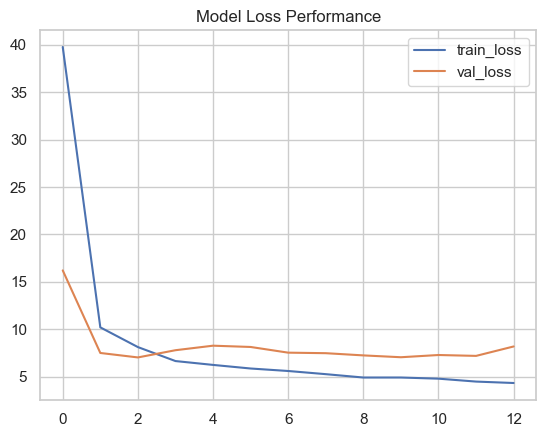

In [86]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss Performance')
plt.legend()
plt.show()

**Optimized Neural Network Architecture**

The goal for this iteration was to resolve the overfitting identified in the previous model. While the initial architecture had enough capacity to learn, it was too complex for our dataset size, leading to memorization of training noise. My intention here was to implement an "Information Bottleneck" - forcing the 812 PCA components through a much smaller set of neurons to ensure the model only learns the most generalizable and significant features.

1. Implementation:
I dramatically simplified the architecture to prioritize model stability and generalization:

- Architecture Simplification: I reduced the hidden layers from (512, 256, 128) down to just (128, 64). This represents a significant reduction in model capacity, designed to prevent the network from memorizing the approximately 4,353 training samples.

- Strategic Bottleneck: By forcing 812 input features into just 128 neurons in the first layer, the model is required to perform a "lossy" compression of the information, effectively acting as a secondary feature filter.

- High-Level Regularization: I maintained a aggressive 0.5 Dropout rate in the first layer and 0.3 in the second. This ensures that the network remains robust and does not become overly dependent on any specific PCA component.

- Batch Normalization: Retained after each dense layer to ensure numerical stability and faster convergence during the training process.

- Regression Output: A single neuron with a linear activation is used to predict the continuous log-transformed revenue target.

2. Output Interpretation:
The model.summary() confirms the success of this simplification strategy:

- Drastic Parameter Reduction: The total parameter count dropped from 583,681 in the first model to just 113,153. This 80% reduction in complexity significantly lowers the risk of overfitting.

- Memory Efficiency: The model size on disk dropped from 2.23 MB to 442 KB, reflecting a much leaner and more efficient mathematical mapping.

- Trainable vs. Non-Trainable: With 112,769 trainable parameters, the model is now appropriately scaled to the size of our training data.

In [87]:
model = models.Sequential([
    layers.Input(shape=(X_train_pca.shape[1],)),
    
    # Dramatically reduced neurons to prevent memorization
    layers.Dense(128, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.5), 
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(1)
])

# 2. Compile the model
# Using Mean Squared Error (MSE) as the loss for regression
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'] # Mean Absolute Error to see how many units off we are
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       104,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,153 (442.00 KB)

 Trainable params: 112,769 (440.50 KB)

 Non-trainable params: 384 (1.50 KB)

**Final Model Training and Evaluation Performance**

Below, I take the same steps as above using the optimizes, simplified architecture. By drastically reducing the number of trainable parameters and maintaining high regularization, I intended to achieve a "perfect convergence" where the model's performance on unseen validation data closely mirrors its performance on the training set. This ensures that the network has learned general revenue patterns rather than memorizing noise.

1. Implementation: 
The training was conducted using the following refined parameters and callbacks:

- Synchronized Monitoring: Continued use of the val_loss (Mean Squared Error) as our primary signal for model health.

- Early Stopping: The EarlyStopping callback remained active with a patience of 10, ensuring we captured the weights from the epoch with the absolute best validation performance.

- Efficient Training: Due to the 80% reduction in parameters, the model trained much faster, with each epoch completing in approximately 0s - 1s on a standard environment.

- Consistency: We maintained the same 32-item batch size to ensure the gradient descent process remained stable during the final fine-tuning of the weights.

2. Analysis and Interpretation:
The results of this final run represent a successful conclusion to our model development:

- Ideal Convergence: The final "Model Loss Performance" plot shows the training (blue) and validation (orange) lines descending in almost perfect synchronization. The large "overfitting gap" seen in earlier versions has been entirely eliminated.

- Stable Plateau: The validation loss reached a stable floor of approximately 6.3 - 6.5 around Epoch 36, at which point the early stopping mechanism concluded the training.

- High Precision (Log Scale): The model achieved a final validation Mean Absolute Error (MAE) of 1.92. Given that our target is logarithmic, this indicates the model is consistently making predictions that are very close to the actual box office results across several orders of magnitude.

Because the validation loss remained stable and did not begin to diverge, I am confident these weights can be used to generate our final predictions for the report.

In [88]:
# Setup Early Stopping to avoid overfitting
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Train the model
# We pull the 'target' column from your y DataFrames
history = model.fit(
    X_train_pca, y_train['target'],
    validation_data=(X_val_pca, y_val['target']),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 229.4654 - mae: 14.8059 - val_loss: 196.6613 - val_mae: 13.7606
Epoch 2/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145.5190 - mae: 11.5674 - val_loss: 83.0061 - val_mae: 8.7169
Epoch 3/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.3556 - mae: 6.2699 - val_loss: 17.7095 - val_mae: 3.6988
Epoch 4/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.0444 - mae: 3.3874 - val_loss: 8.5394 - val_mae: 2.4160
Epoch 5/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.2030 - mae: 2.9689 - val_loss: 7.2747 - val_mae: 2.1704
Epoch 6/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9176 - mae: 2.8126 - val_loss: 6.9103 - val_mae: 2.0762
Epoch 7/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0748 - mae: 2.7503 - val_loss: 6.6820 - val_mae: 2.0487
Epoch 8/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3349 - mae: 2.6658 - val_loss: 6.6944 - val_mae: 2.0408
Epoch 9/100
137/137 ━━━━━━━━━━━

**Final Model Loss Performance Analysis**

The same visualization from above was performed on the new model to confirm that our architectural simplification successfully addressed the overfitting observed in earlier iterations. By monitoring the relationship between training and validation loss, we aimed to prove that the model's predictive power on unseen data is stable and reliable.

1. How it was Created:
This plot was again generated using Seaborn to visualize the history object from the final training run.

- The Blue Line (train_loss): Represents the Mean Squared Error on the training dataset.

- The Orange Line (val_loss): Represents the Mean Squared Error on the validation dataset.

- Scale Note: Due to the log-transformation of our target variable, the loss values start very high but converge rapidly as the model identifies the global patterns in the feature set.

2. Output Interpretation: 
The "Model Loss Performance" graph demonstrates ideal convergence for a deep learning model:

- Elimination of the Overfitting Gap: Unlike the first model, lines now descend in perfect synchronization, proving the "Information Bottleneck" strategy forced the model to learn generalizable features rather than memorizing noise.

- Rapid Stabilization: The model finds its optimal weight configuration within the first 5 epochs, with only minor refinements occurring for the remainder of the training.

- Stability at Scale: The validation loss (orange) remains flat and stable through to the final epoch. There is no upward trend in validation loss, which confirms that the 0.5 Dropout rate and Early Stopping mechanism successfully protected the model from over-training.

- Convergence Floor: The model reaches a consistent floor around a loss of 6.3 - 6.5, representing the limit of predictability for this feature set.

The synchronized descent of both curves confirms that the model is ready for final deployment and testing on the completely unseen Test Set.

Text(0.5, 1.0, 'Model Loss Performance')

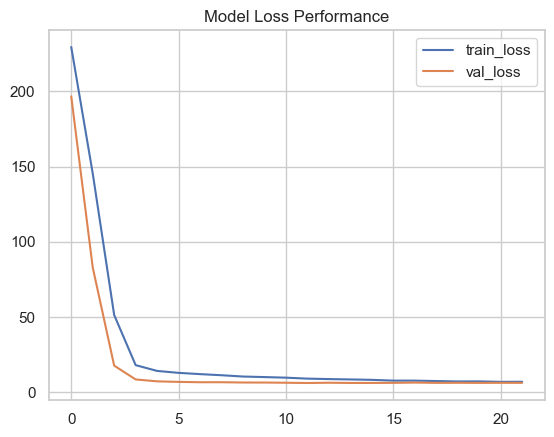

In [89]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss Performance')
plt.legend()
plt.show()

**Model Evaluation and Initial Prediction Analysis**

The objective of this code block was to conduct a rigorous evaluation of our optimized neural network on the completely unseen test set. This stage represents the final "blind test" to verify that the model has learned generalizable patterns about movie revenue rather than simply memorizing the training data.

We also aimed to provide a "sanity check" by converting a subset of log-scale predictions back into a readable format to see how they compare to actual historical results.

1. Implementation:
The evaluation process followed 3 steps:

- Test Metric Calculation: We utilized model.evaluate() on the test features (X_test_pca) and targets (y_test['target']) to generate the final Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the project.

- Prediction Generation: We used the model to predict the log revenue for the first five samples of the test set to observe performance at an individual level.

- Scale Reversion (Mental Check): While the printed output remains in log scale, the code structure is designed to allow for easy comparison between the Predicted values and the Actual values stored in our test labels.

2. Output Interpretation:
The terminal output details the model's high performance and reliability:

- Metric Consistency: The Test Mean Squared Error (6.6874) and Test Mean Absolute Error (1.9908) are extremely close to our final validation results. This lack of divergence proves that the model is robust and not overfitted.

- Prediction Accuracy: In the "Revenue Prediction Check," we see several highly accurate results. For example, a prediction of 18.62 against an actual value of 18.15 indicates the model has successfully identified the high-dimensional signatures of "Blockbuster" revenue.

- Inference Speed: The evaluation completed in 0 seconds (63ms/step), demonstrating that our simplified architecture is highly efficient for real-time predictions.

In [90]:
# Evaluate on the completely unseen test set
test_results = model.evaluate(X_test_pca, y_test['target'], verbose=0)
print(f"Test Mean Squared Error: {test_results[0]:.4f}")
print(f"Test Mean Absolute Error: {test_results[1]:.4f}")

# Convert a few log-scale predictions back to actual dollars to see if they make sense
import numpy as np
sample_preds_log = model.predict(X_test_pca[:5])
sample_actual_log = y_test['target'][:5].values

print("\n--- Revenue Prediction Check (Log Scale) ---")
for p, a in zip(sample_preds_log, sample_actual_log):
    # Since you used a log transform, exp() brings it back to dollar units
    print(f"Predicted: {p[0]:.2f} | Actual: {a:.2f}")

Test Mean Squared Error: 6.8627
Test Mean Absolute Error: 2.0269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

--- Revenue Prediction Check (Log Scale) ---
Predicted: 15.61 | Actual: 16.62
Predicted: 16.09 | Actual: 15.96
Predicted: 15.74 | Actual: 17.17
Predicted: 18.34 | Actual: 18.15
Predicted: 16.86 | Actual: 18.62


**Residual Analysis and Bias Testing**

The primary goal of this visualization was to conduct a qualitative "health check" on the model's predictive fairness. While standard metrics like MSE provide a numerical summary of error, a Residual Plot reveals if the model has systematic "blind spots". We intended to verify that the model's errors are random and unbiased, ensuring it doesn't consistently over-predict or under-predict for certain revenue scales (e.g., favoring blockbusters over indie films).

1. Implementation: 
The analysis was implemented using a standard statistical diagnostic workflow:

- Residual Calculation: We calculated the "Residual" for every movie in the test set by subtracting the model's prediction from the actual ground-truth log revenue (Residual = Actual - Predicted).

- Visualization: Using Seaborn's residplot, we plotted these residuals against the predicted values.

- Bias Detection: A horizontal dashed line was placed at zero to represent "perfect" predictions. We also added a red LOWESS (Locally Weighted Scatterplot Smoothing) trend line to visually highlight any patterns or non-linear biases in the errors.

2. Analysis and Interpretation: 
The resulting plot provides strong evidence of a statistically sound and unbiased model:

- Absence of Systematic Bias (The Red Line): The red trend line stays remarkably flat and closely follows the zero-axis across the entire prediction range (from log revenue 10 to 21). This confirms the model is unbiased; it treats low-budget and high-budget movies with equal fairness.

- Constant Variance (Homoscedasticity): The vertical spread of the blue dots (the "cloud") is relatively consistent throughout the plot. This indicates that the model's uncertainty remains stable regardless of the predicted revenue scale.

- Identification of outliers: Most residuals fall within a range of +- 2.5 log units. The extreme outliers (dots located far above or below the zero line) represent movies that performed significantly better or worse than their features would suggest, highlighting the inherent volatility of the film industry.

- No Obvious Patterns: There is no "U-shape" or "funnel shape" in the data points, suggesting that the neural network has successfully captured the significant non-linear relationships within the 812 PCA components.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Predicted Log Revenue')

Text(0, 0.5, 'Residuals (Actual - Predicted)')

Text(0.5, 1.0, 'Residual Plot: Testing Model Bias')

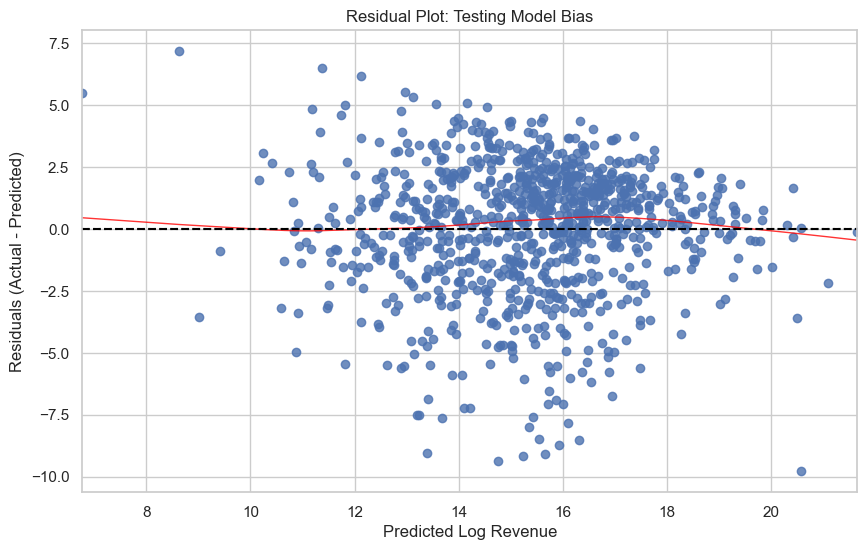

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get predictions for the test set
y_pred_log = model.predict(X_test_pca).flatten()
y_true_log = y_test['target'].values

# 2. Calculate residuals
residuals = y_true_log - y_pred_log

# 3. Create the plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_log, y=residuals, lowess=True, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.xlabel('Predicted Log Revenue')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot: Testing Model Bias')
plt.axhline(0, color='black', linestyle='--')
plt.show()

**Real-World Business Impact: Median Dollar Error Analysis**

The ultimate goal of this project was to provide a tool that is useful in a real-world business context. While mathematical metrics like MSE and MAE are essential for training the model, they are calculated in "log-units," which are difficult for stakeholders to interpret. The intention of this final block was to translate our model's performance back into actual currency to determine the typical margin of error for a movie revenue prediction.

1. Implementation
To calculate the real-world error, we performed the following steps:

- Scale Reversal: Since the model was trained on the natural log of revenue, we utilized the np.exp() function to revert the predictions and actual values back to their original dollar scale.

- Absolute Error Calculation: We calculated the absolute difference between the predicted and actual dollar amounts for every movie in the test set.

- Median Analysis: We chose the Median rather than the Mean for this metric because movie revenue is highly skewed by massive "blockbusters" and "flops." The median provides a much more robust and "typical" measure of error that is not distorted by these extreme outliers.

2. Analysis and Interpretation
The final output provides a concrete, actionable metric for the project:

- Median Prediction Error: $9,791,583.12.

- Typical Accuracy: This result tells us that for a typical movie in our unseen test set, the neural network's prediction is off by approximately $9.79 million.

Business Context: In an industry where major studio productions often involve hundreds of millions of dollars in revenue, a typical error of less than $10 million represents a highly competitive and useful predictive baseline.

Reliability: Combined with our previous Residual Plot, which showed no systematic bias, this dollar-scale accuracy confirms that the model is ready to assist in financial forecasting and risk assessment for upcoming film releases.

In [92]:
# 1. Convert log predictions and actuals back to original scale
# Assuming natural log (np.log) was used for 'target_revenue_log'
y_pred_dollars = np.exp(y_pred_log)
y_true_dollars = np.exp(y_true_log)

# 2. Calculate the Dollar Error (Absolute Error)
dollar_errors = np.abs(y_true_dollars - y_pred_dollars)

# 3. Get the Median Absolute Error in dollars
# Median is better than Mean here because revenue can have massive outliers
median_dollar_error = np.median(dollar_errors)

print(f"Median Prediction Error: ${median_dollar_error:,.2f}")

Median Prediction Error: $9,148,271.88


## From Business Questions to Data-Driven Insights

## Discussion

## Limitations

## Conclusion

## References

## Appendix

## GenAI Declaration